<h2 style='color:blue' align='center'>Small Image Classification Using Convolutional Neural Network (CNN)</h2>

In this notebook, we will classify small images malaria dataset from Kaggle datasets. There are total 2 classes as shown below, parasitized and uninfected. Dataset link -> https://www.kaggle.com/datasets/iarunava/cell-images-for-detecting-malaria

<h4 style="color:purple">Load the dataset</h4>

In [53]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical
from PIL import Image
from PIL import UnidentifiedImageError

# Set the path to your cell_images folder
data_dir = 'cell_images'  # e.g., '/path/to/cell_images'

# Initialize empty lists to store the images and labels
images = []
labels = []

# Mapping the classes: 'parasitized' -> 1, 'uninfected' -> 0
class_mapping = {'parasitized': 1, 'uninfected': 0}

# Iterate over the subfolders: 'parasitized' and 'uninfected'
for class_name in class_mapping.keys():
    class_dir = os.path.join(data_dir, class_name)
    
    # Iterate over the images in the subfolder
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        
        try:
            # Try to open the image using PIL to check if it's a valid image
            with Image.open(img_path) as img:
                # Load the image using Keras ImageDataGenerator
                img = img.resize((64, 64))  # Resize images to a fixed size
                img_array = img_to_array(img)
                
                # Append the image and its label to the lists
                images.append(img_array)
                labels.append(class_mapping[class_name])
        except UnidentifiedImageError:
            # Handle the error when an image is not valid (corrupted file, wrong format, etc.)
            print(f"Skipping invalid image: {img_path}")
        except Exception as e:
            # Catch other potential errors (e.g., file access issues)
            print(f"Error processing image {img_path}: {e}")

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)
print('job completed')

Skipping invalid image: cell_images/parasitized/Thumbs.db
Skipping invalid image: cell_images/uninfected/Thumbs.db
job completed


In [61]:

# Normalize the image data to [0, 1]
images = images / 255.0

# One-hot encode the labels
#labels = to_categorical(labels, num_classes=2)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (22046, 64, 64, 3)
Test data shape: (5512, 64, 64, 3)


In [67]:
X_test.shape

(5512, 64, 64, 3)

In [69]:
y_train.shape

(22046,)

Here we see there are 50000 training images and 1000 test images

In [72]:
y_train.shape

(22046,)

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [75]:
classes = ['uninfected','parasitized']

<h4 style="color:purple">Let's plot some images to see what they are</h4>

In [78]:
def plot_sample(X, y, index):
    plt.figure(figsize = (30,5))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

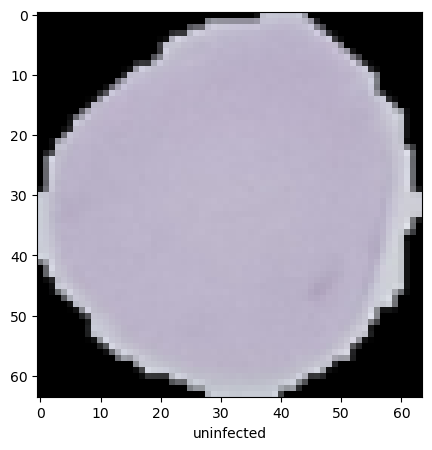

In [80]:
plot_sample(X_train, y_train, 10240)

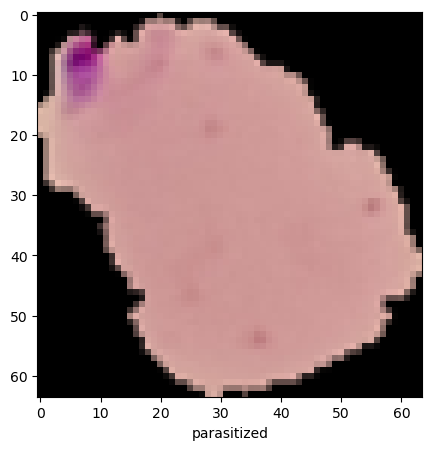

In [82]:
plot_sample(X_train, y_train, 100)

<h4 style="color:purple">Build simple artificial neural network for image classification</h4>

In [86]:
ann = models.Sequential([
        layers.Flatten(input_shape=(64,64,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(2, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
689/689 [==============================] - 23s 33ms/step - loss: 0.6656 - accuracy: 0.6154
Epoch 2/5
689/689 [==============================] - 23s 33ms/step - loss: 0.6198 - accuracy: 0.6540
Epoch 3/5
689/689 [==============================] - 23s 33ms/step - loss: 0.6053 - accuracy: 0.6702
Epoch 4/5
689/689 [==============================] - 23s 33ms/step - loss: 0.5953 - accuracy: 0.6788
Epoch 5/5
689/689 [==============================] - 23s 33ms/step - loss: 0.5862 - accuracy: 0.6912


**You can see that at the end of 5 epochs, accuracy is at around 69%**

In [89]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

173/173 [==============================] - 2s 10ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.63      0.82      0.71      2715
           1       0.75      0.53      0.62      2797

    accuracy                           0.67      5512
   macro avg       0.69      0.67      0.67      5512
weighted avg       0.69      0.67      0.66      5512



<h4 style="color:purple">Now let us build a convolutional neural network to train our images</h4>

In [92]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(2, activation='sigmoid')
])

In [94]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [96]:
cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
689/689 [==============================] - 15s 21ms/step - loss: 0.4151 - accuracy: 0.8037
Epoch 2/5
689/689 [==============================] - 14s 21ms/step - loss: 0.1974 - accuracy: 0.9306
Epoch 3/5
689/689 [==============================] - 15s 21ms/step - loss: 0.1646 - accuracy: 0.9442
Epoch 4/5
689/689 [==============================] - 15s 21ms/step - loss: 0.1451 - accuracy: 0.9524
Epoch 5/5
689/689 [==============================] - 15s 21ms/step - loss: 0.1240 - accuracy: 0.9588


**With CNN, at the end 5 epochs, accuracy was at around 95% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features**

In [114]:
cnn.evaluate(X_test,y_test)

173/173 [==============================] - 1s 6ms/step - loss: 0.1718 - accuracy: 0.9508


[0.1718471199274063, 0.9508345723152161]

In [101]:
y_pred = np.argmax(cnn.predict(X_test),axis=1)
y_pred_percent =  np.max(cnn.predict(X_test),axis=1)
y_pred_percent[:5]

173/173 [==============================] - 1s 6ms/step


array([0.895938  , 0.99926245, 0.958351  , 0.89095175, 0.91092956],
      dtype=float32)

<h4 style="color:purple">Now let us display the results</h4>

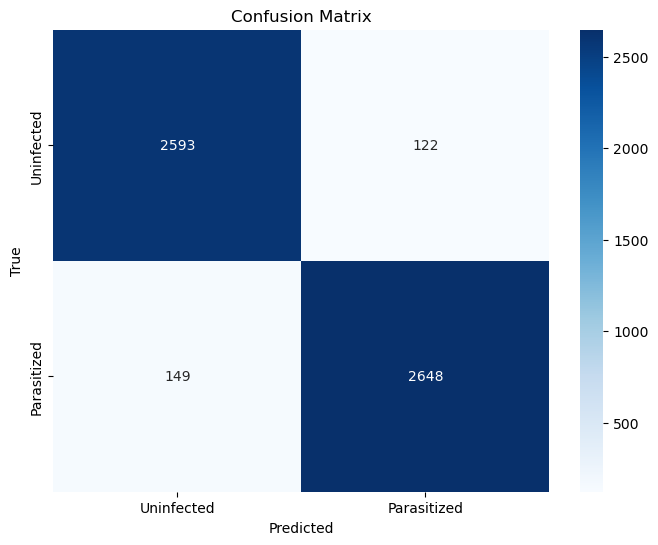

In [102]:
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Uninfected', 'Parasitized'], yticklabels=['Uninfected', 'Parasitized'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

/var/folders/v7/xr275__n7psflnzz4cptcccm0000gn/T/ipykernel_1196/376432175.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize = (30,5))


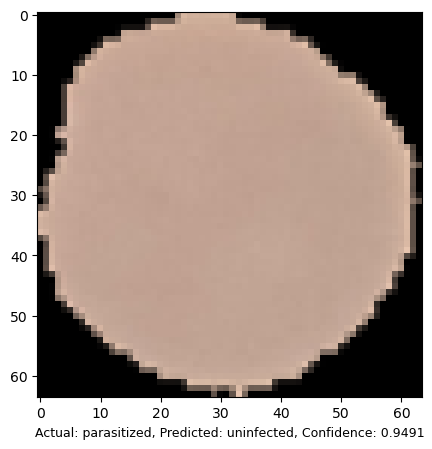

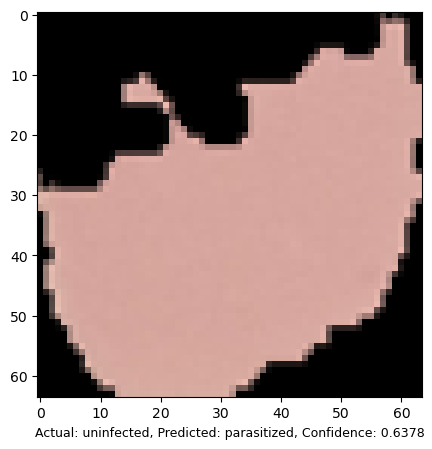

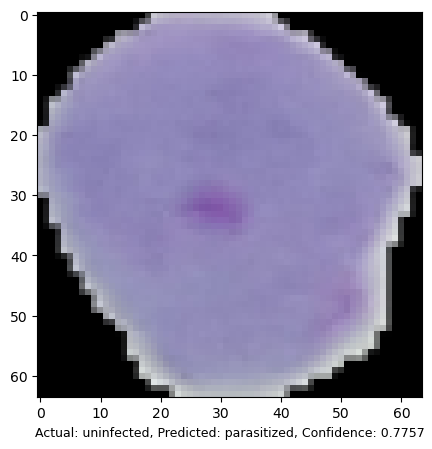

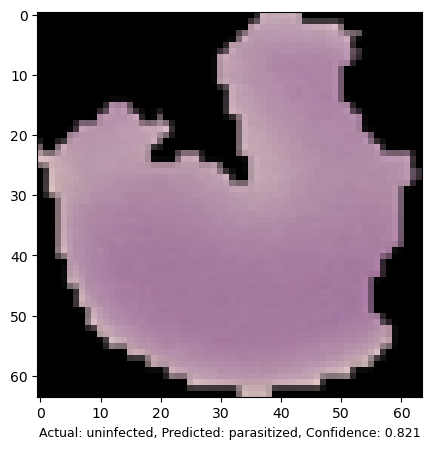

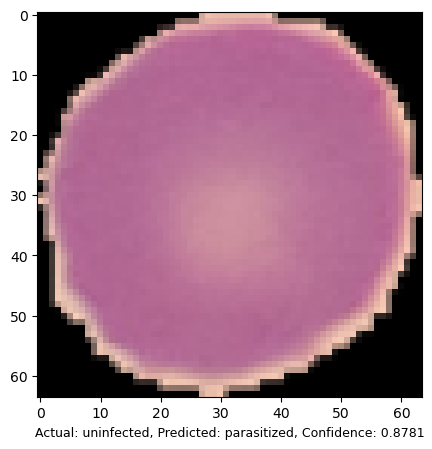

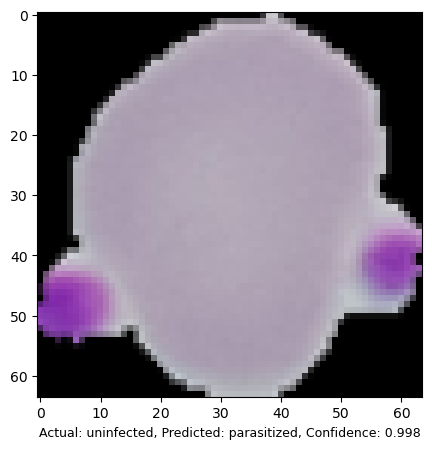

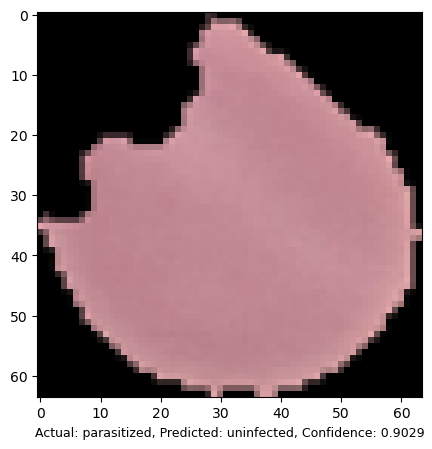

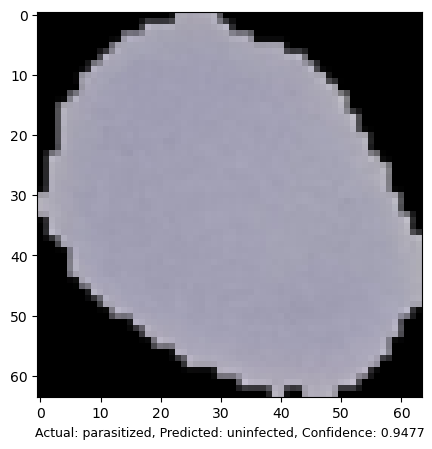

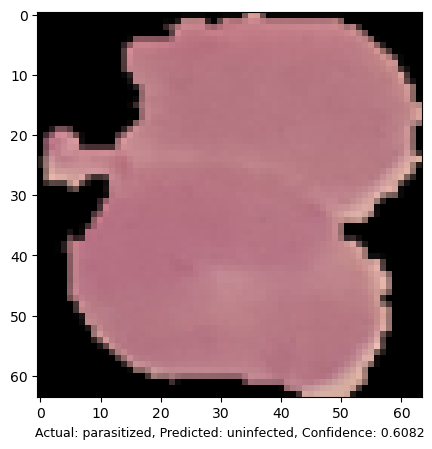

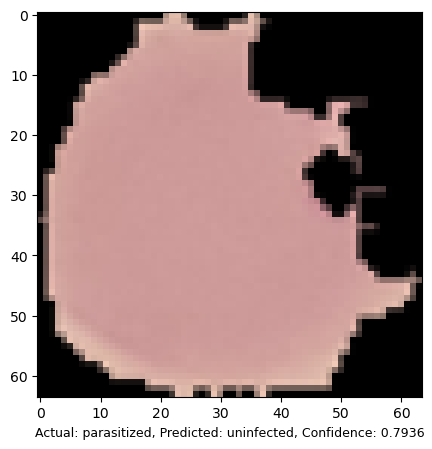

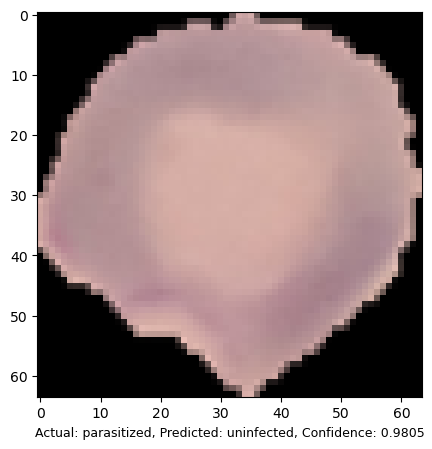

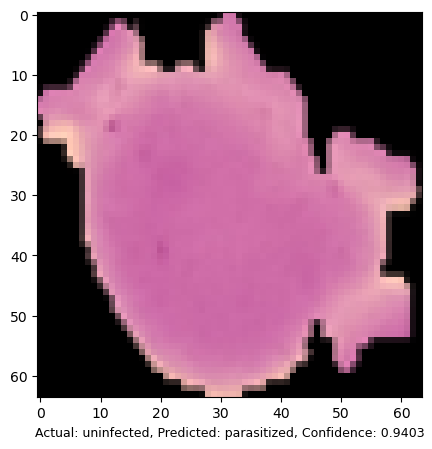

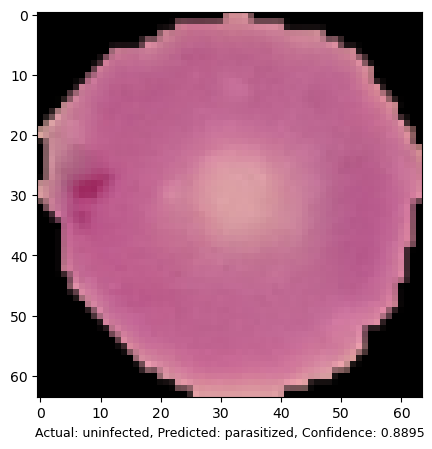

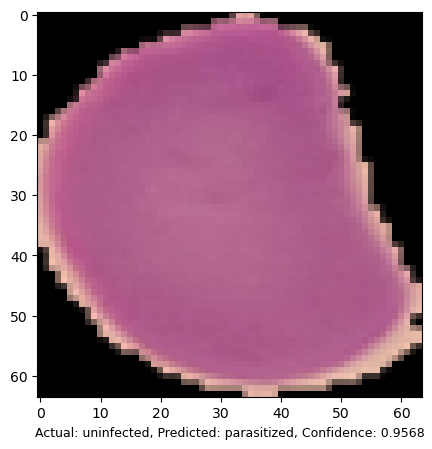

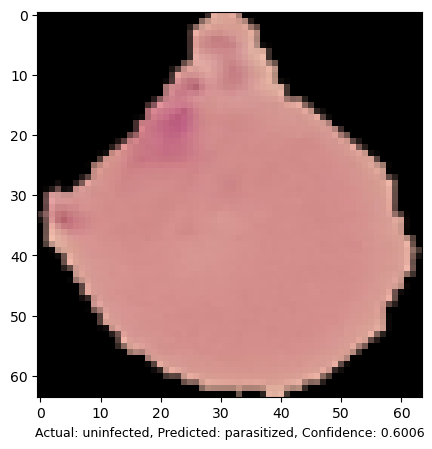

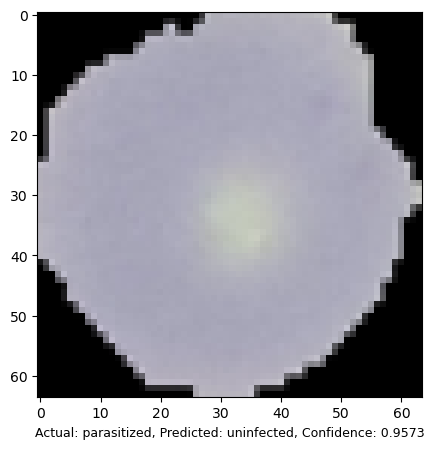

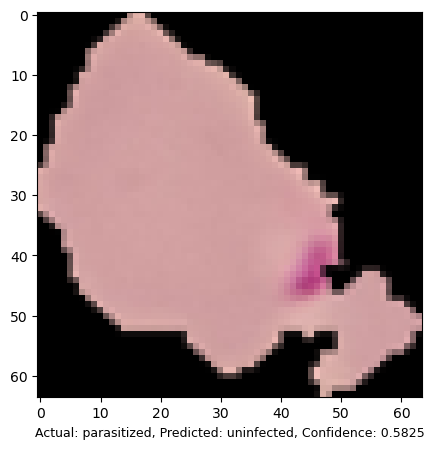

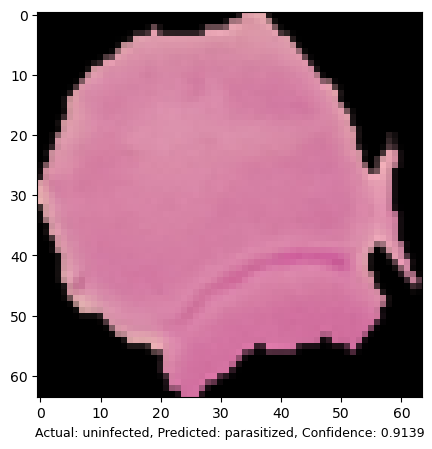

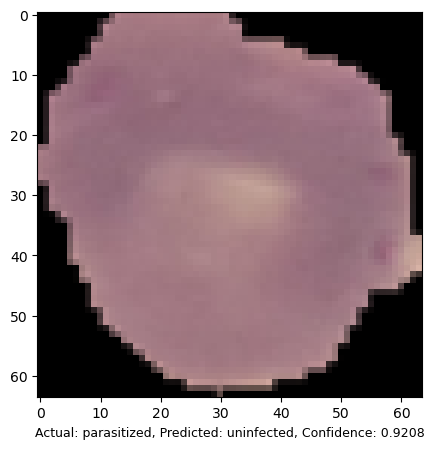

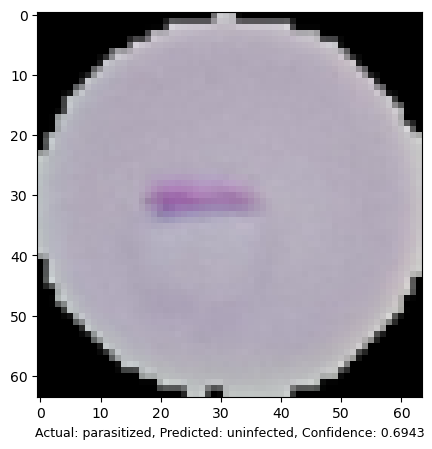

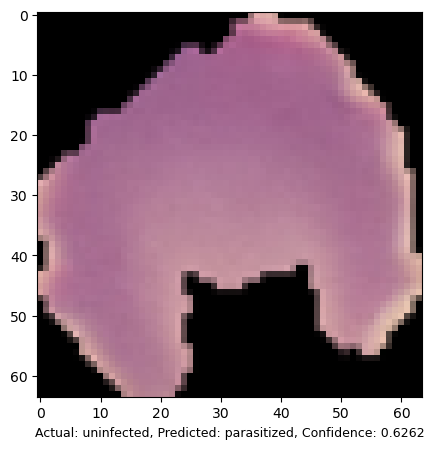

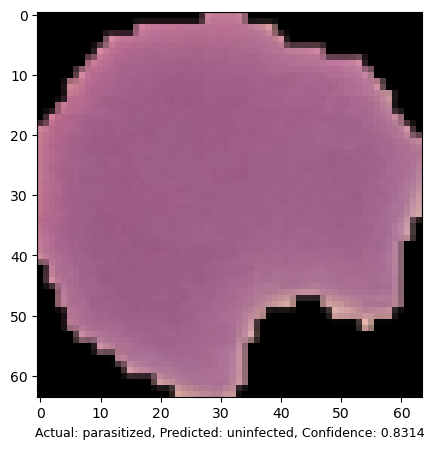

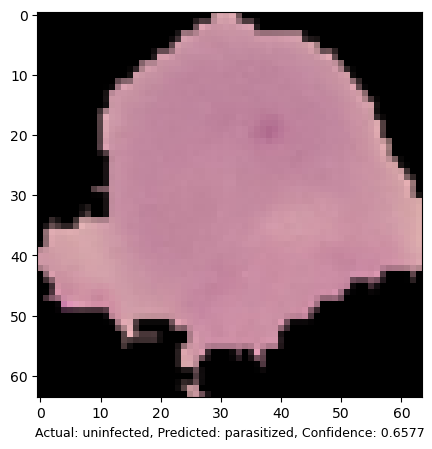

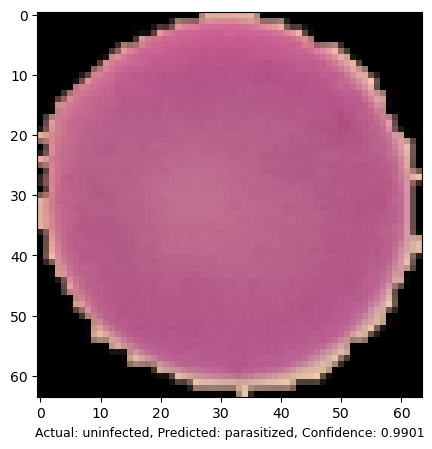

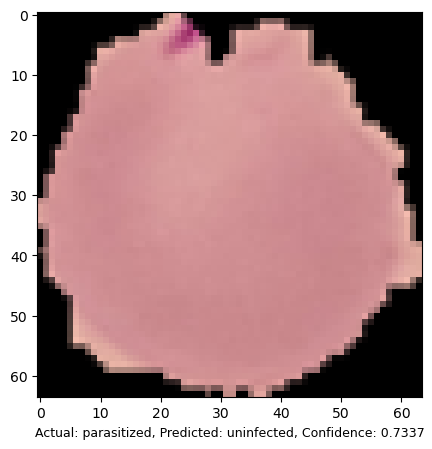

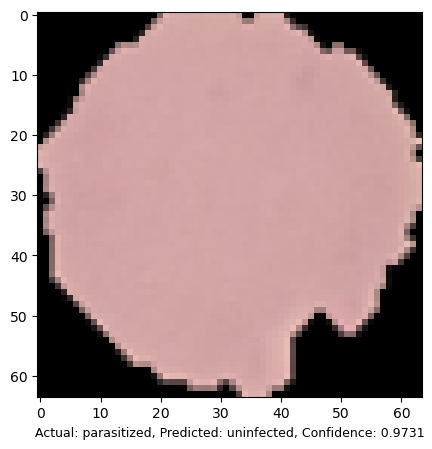

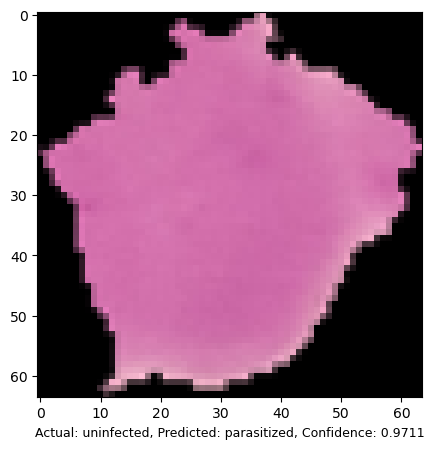

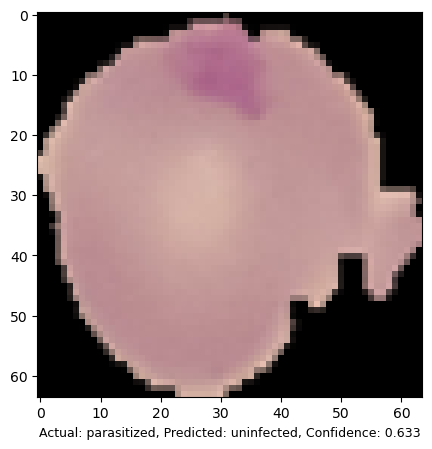

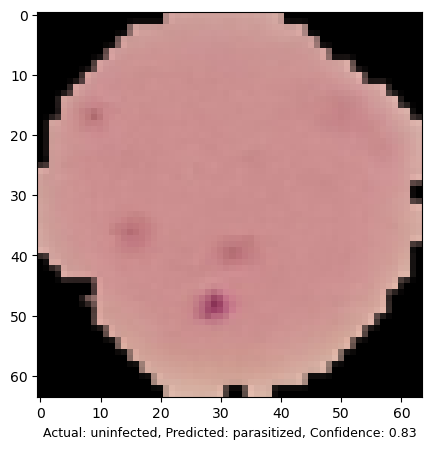

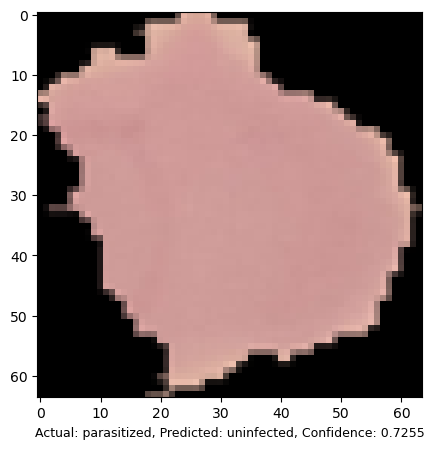

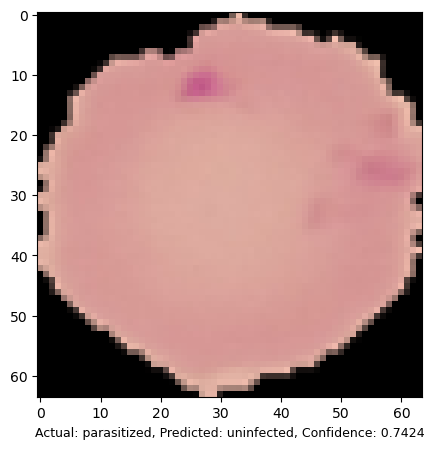

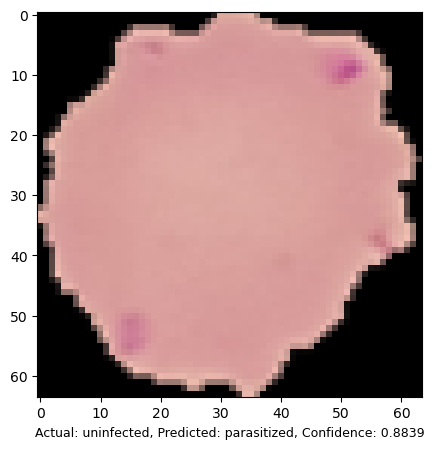

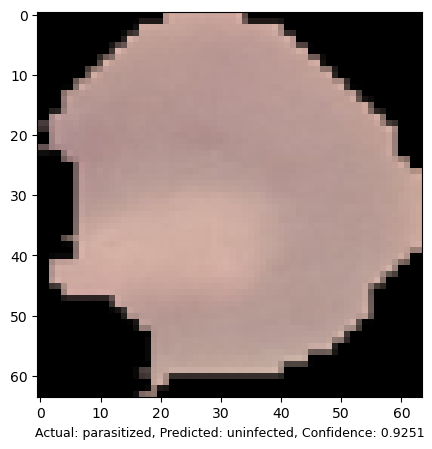

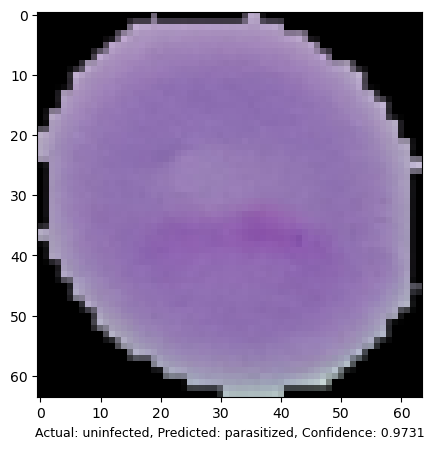

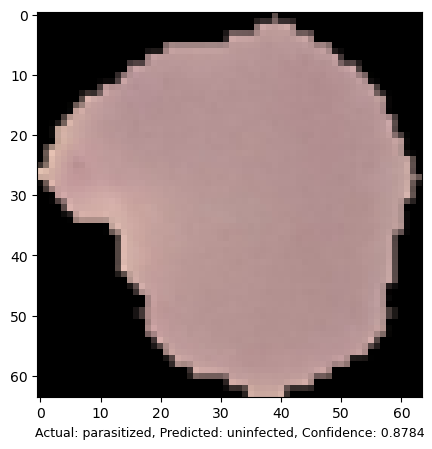

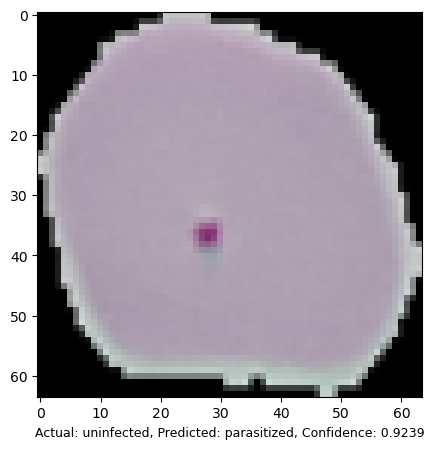

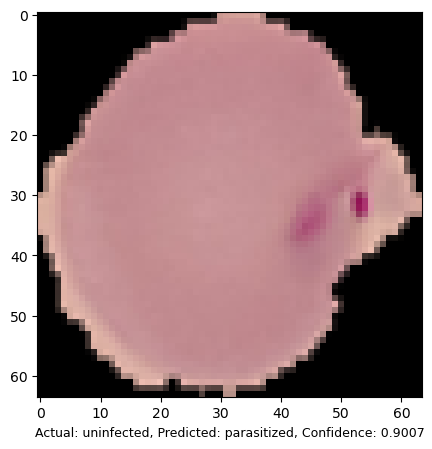

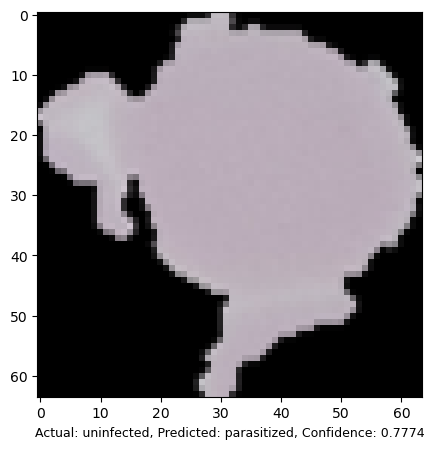

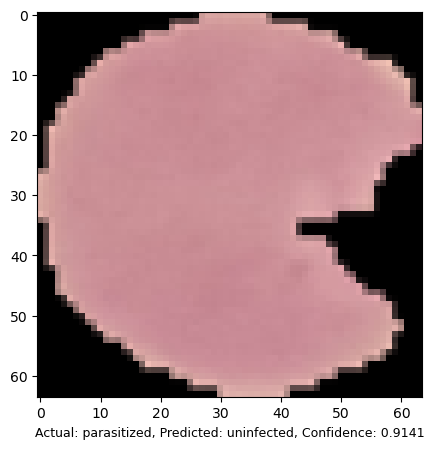

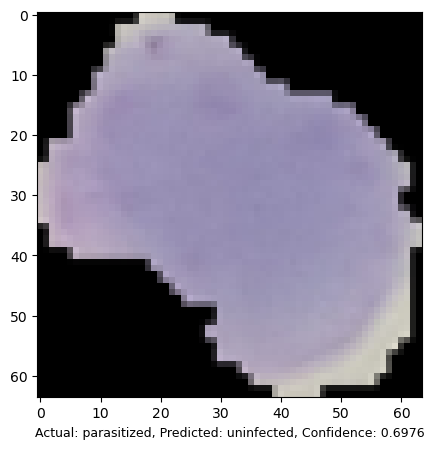

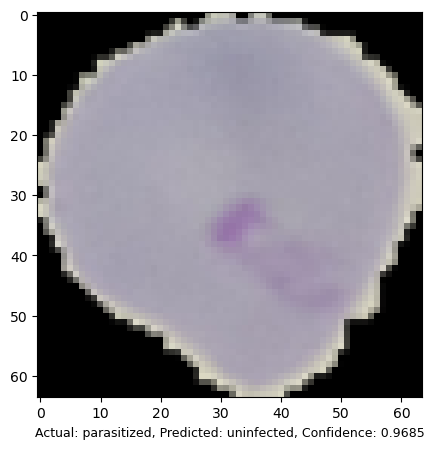

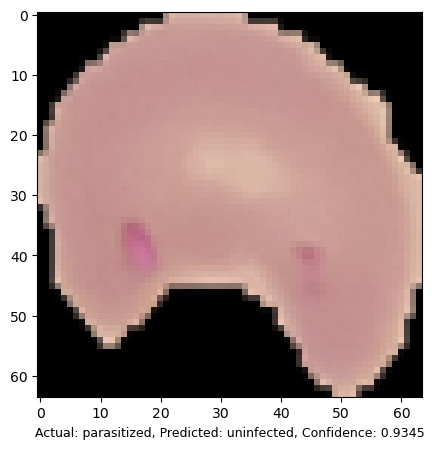

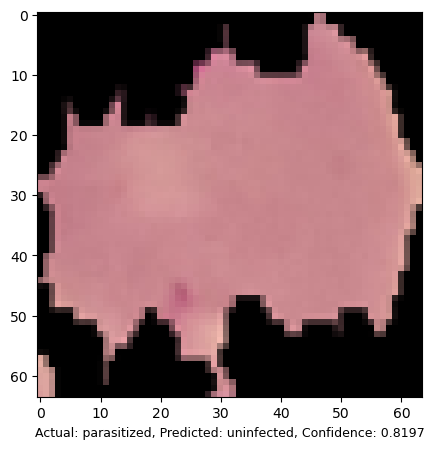

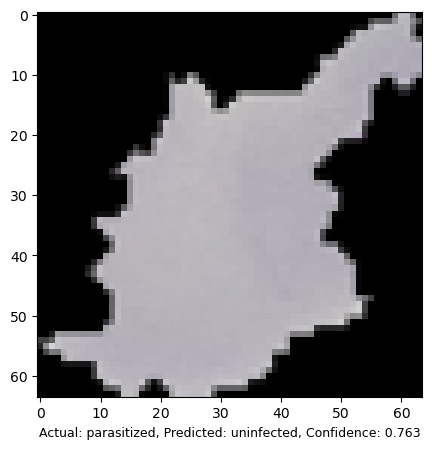

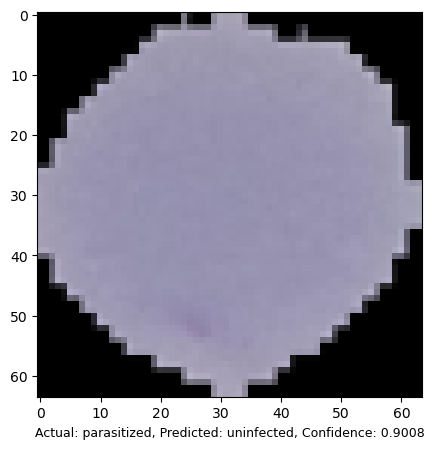

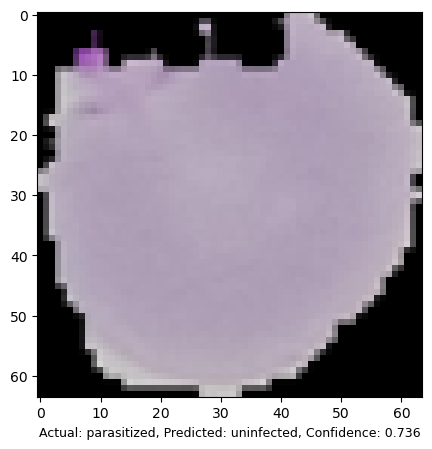

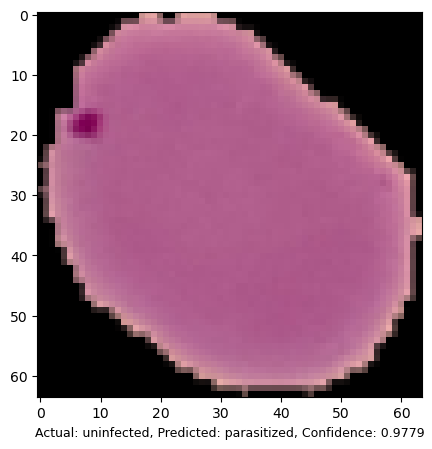

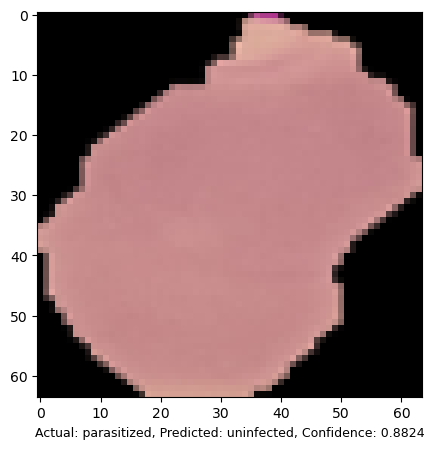

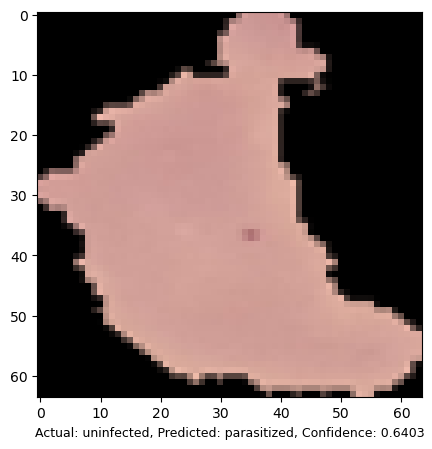

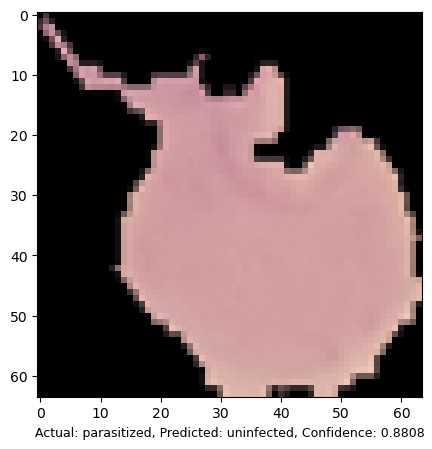

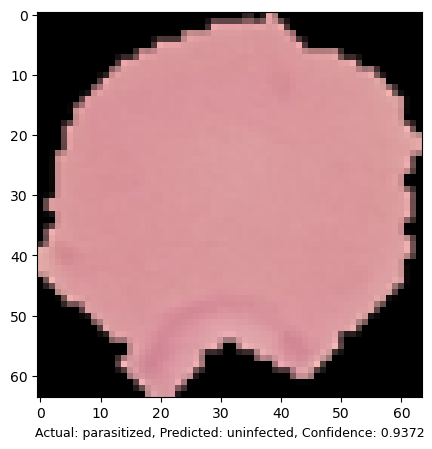

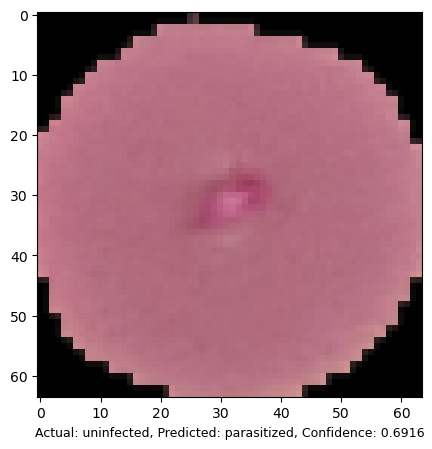

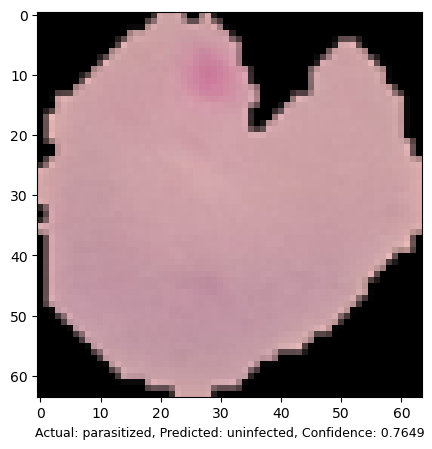

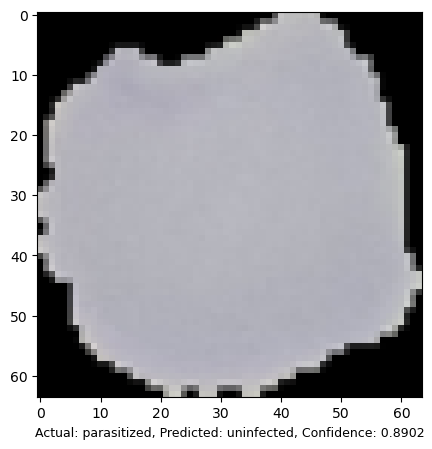

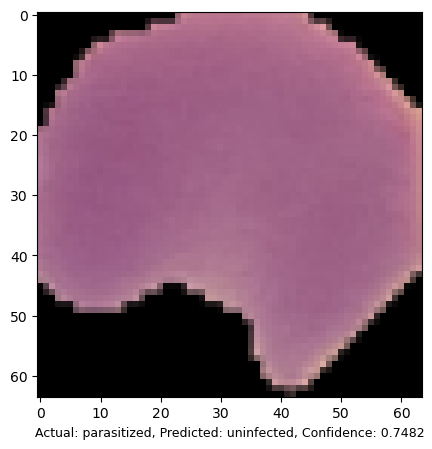

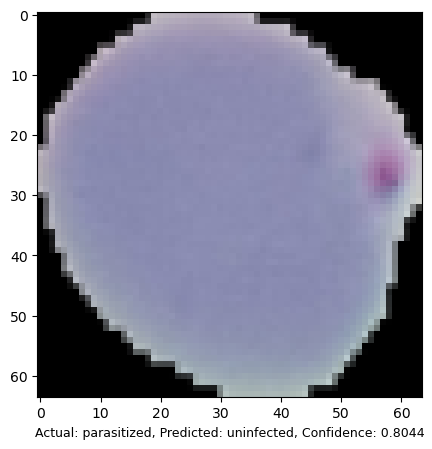

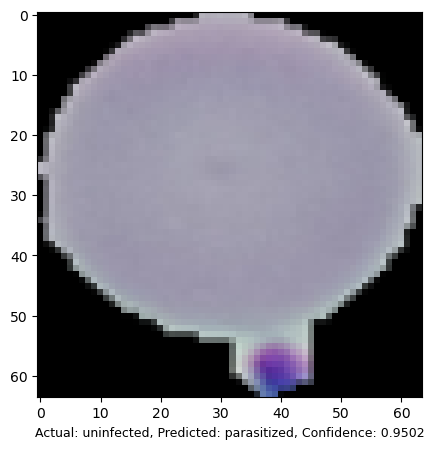

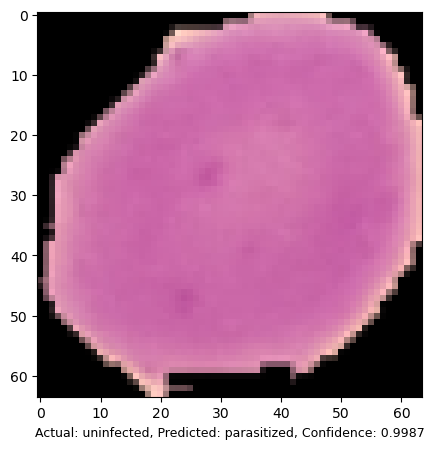

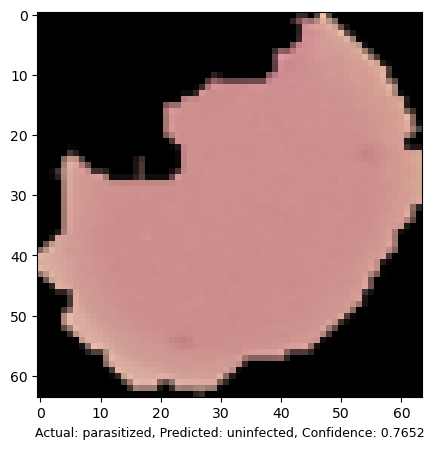

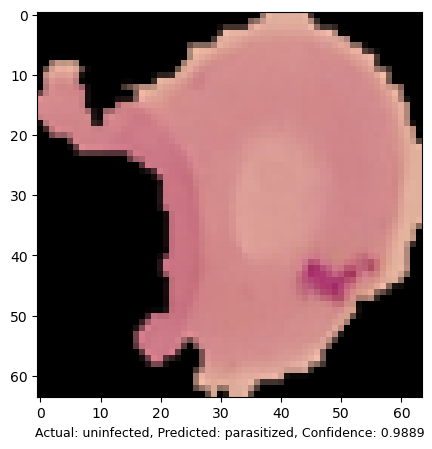

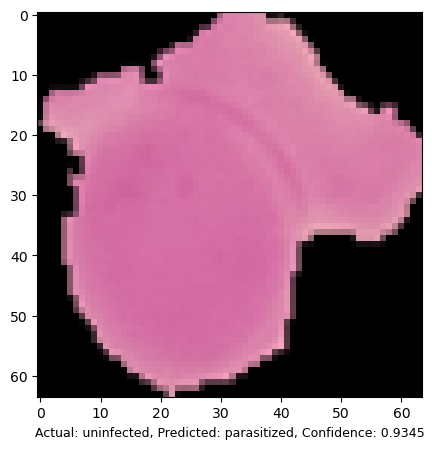

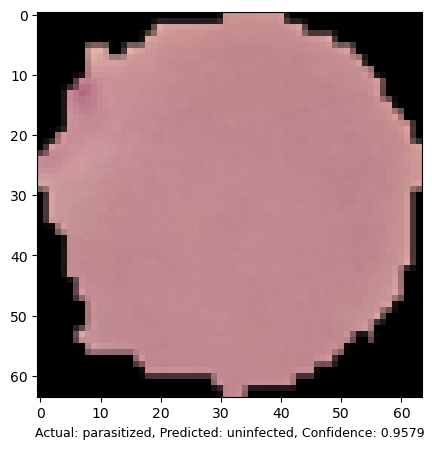

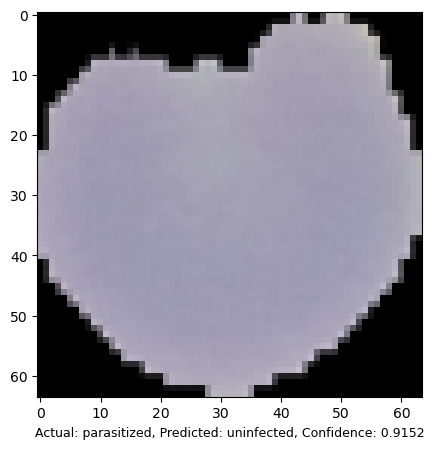

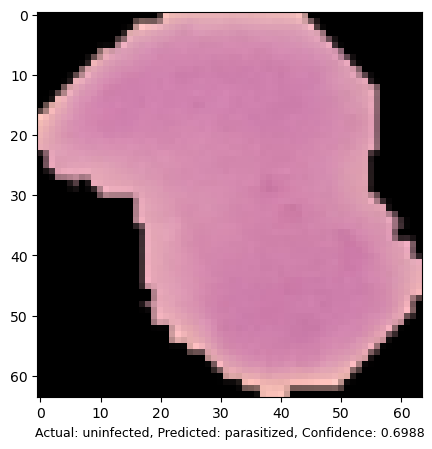

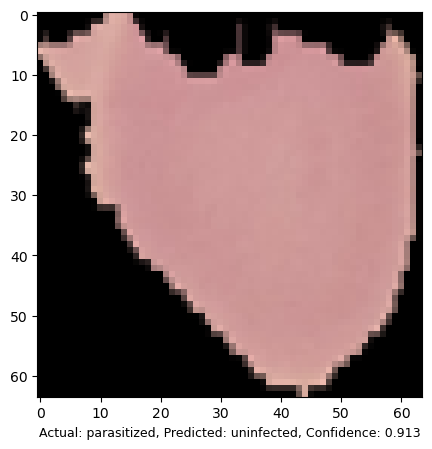

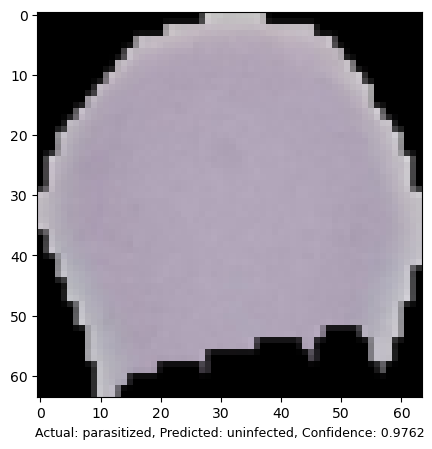

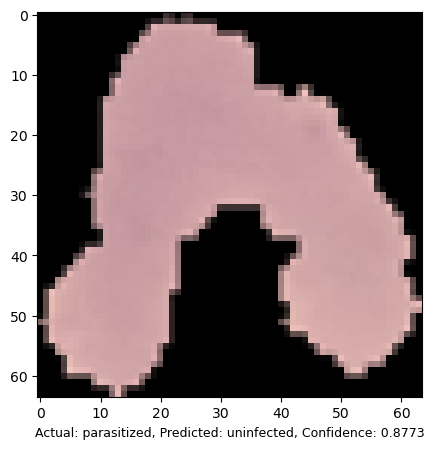

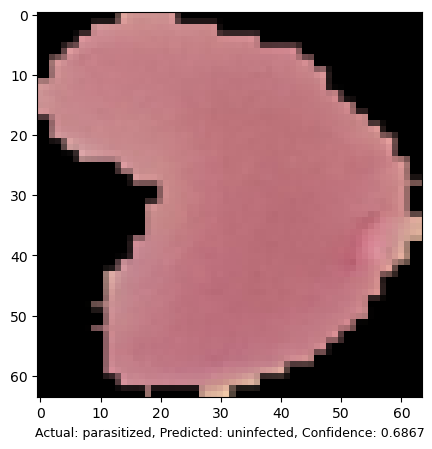

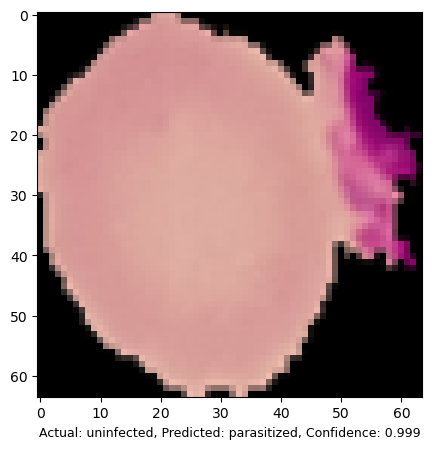

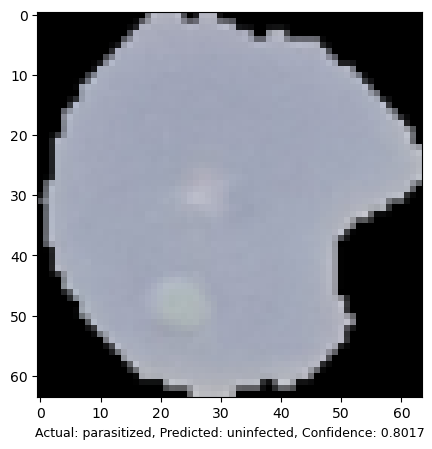

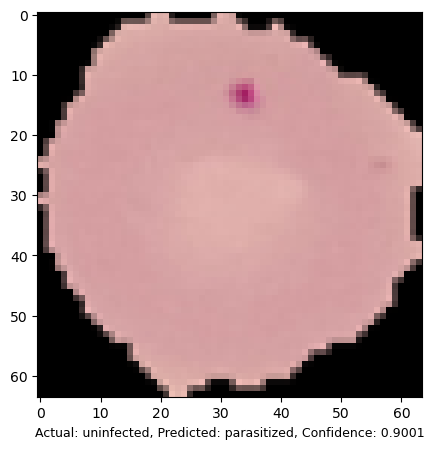

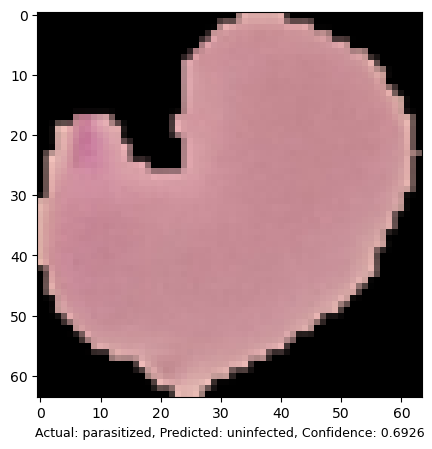

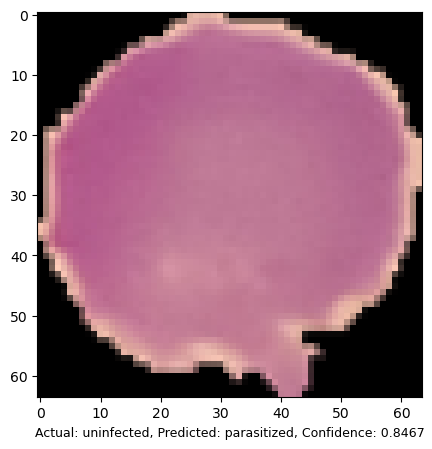

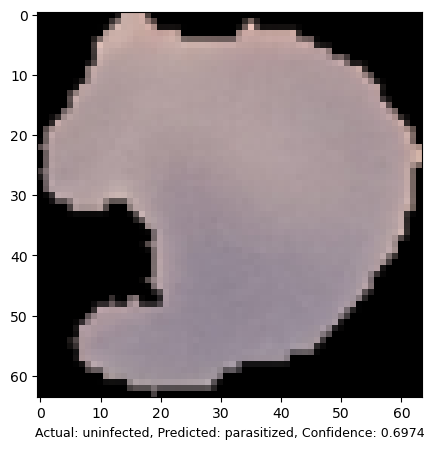

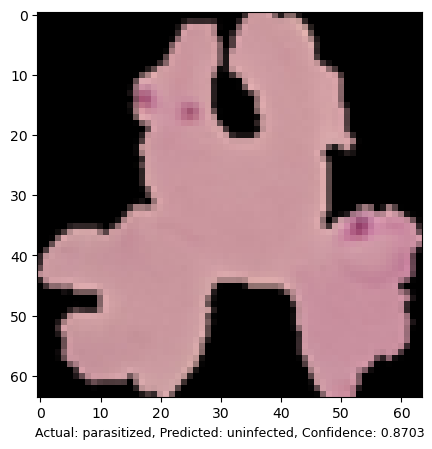

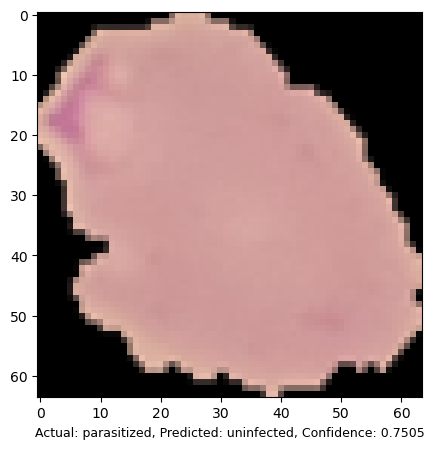

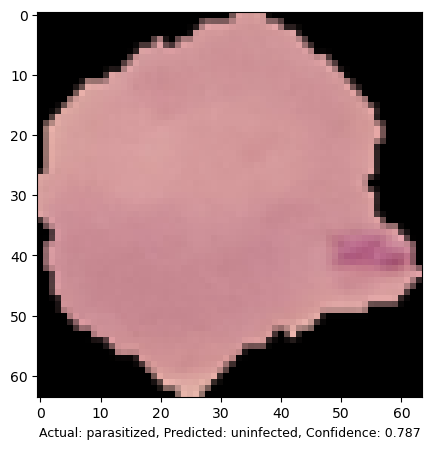

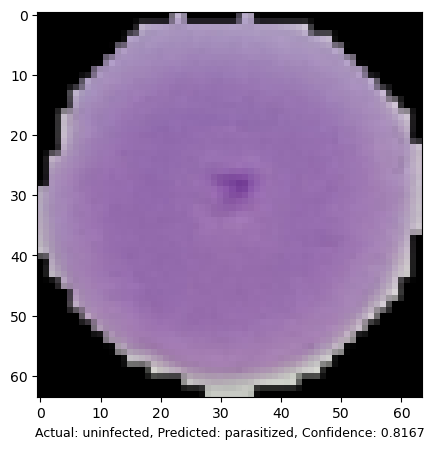

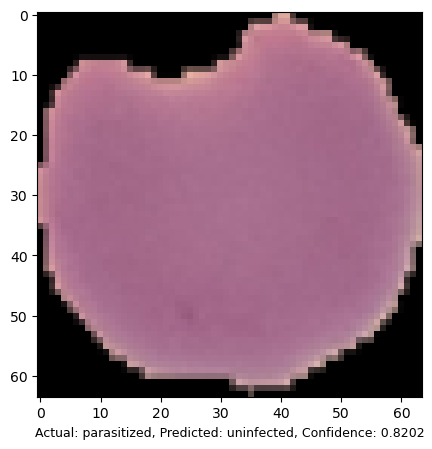

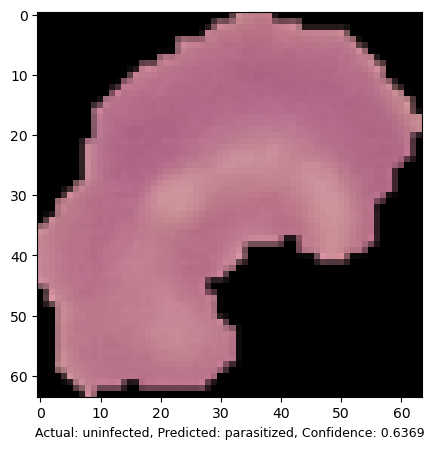

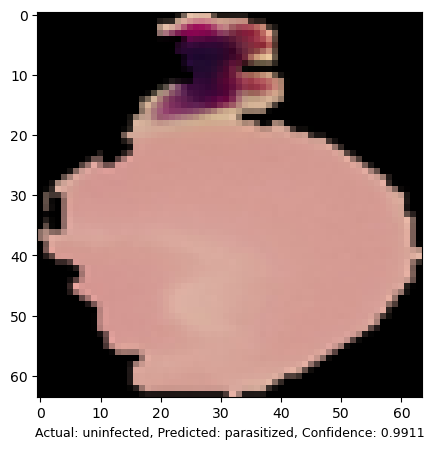

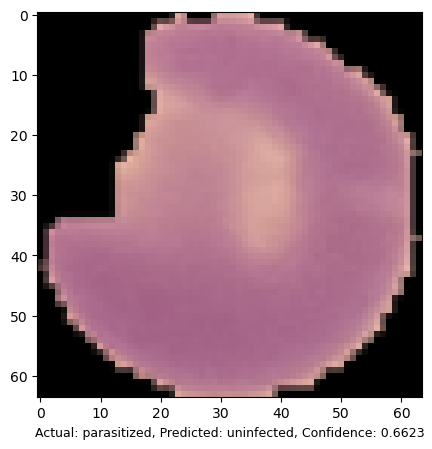

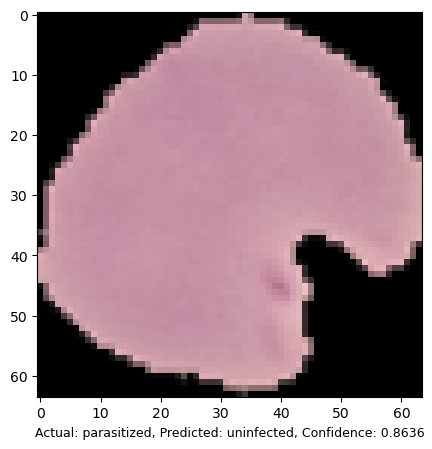

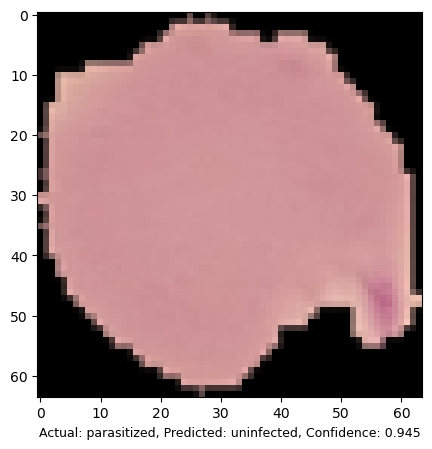

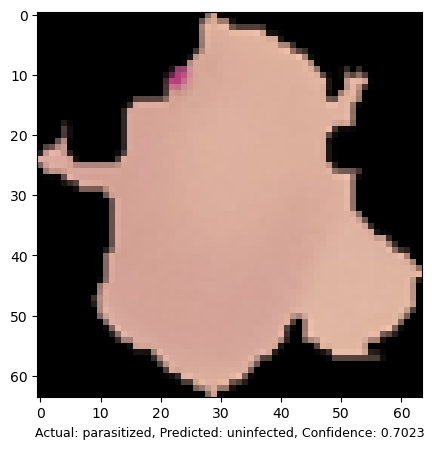

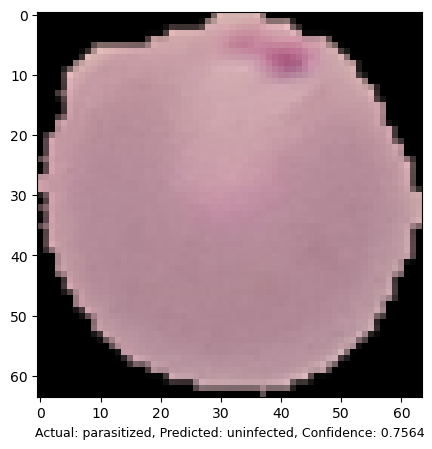

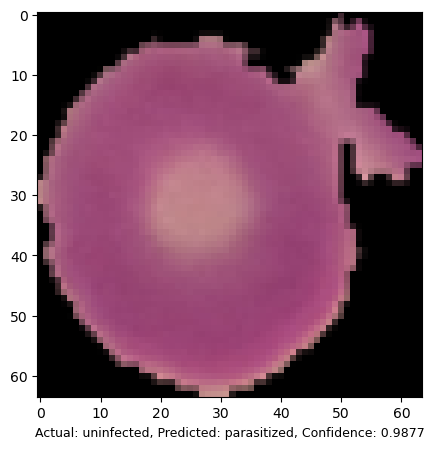

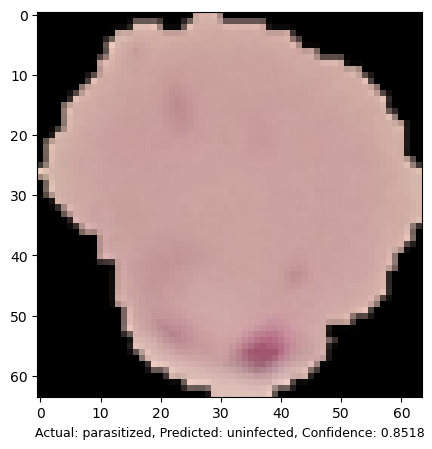

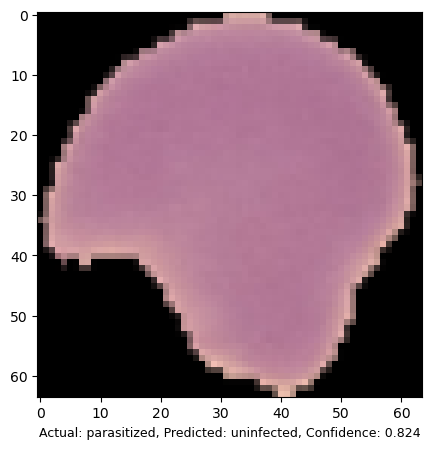

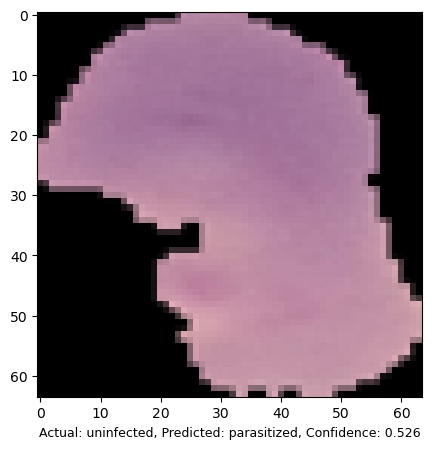

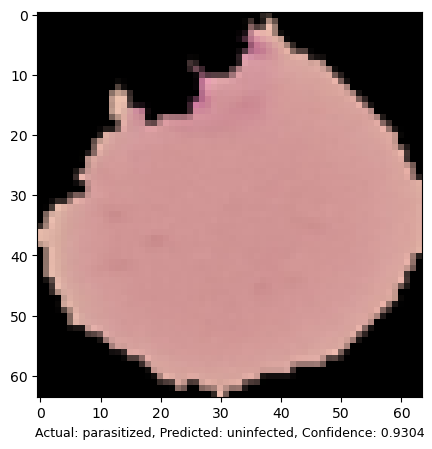

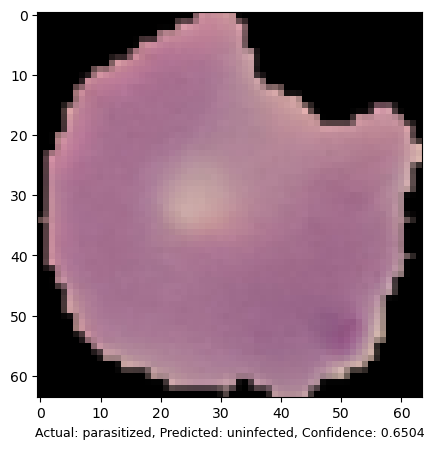

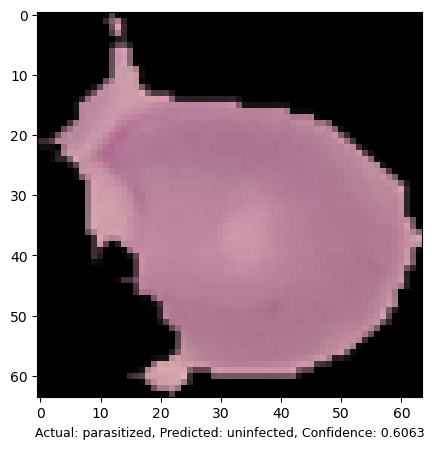

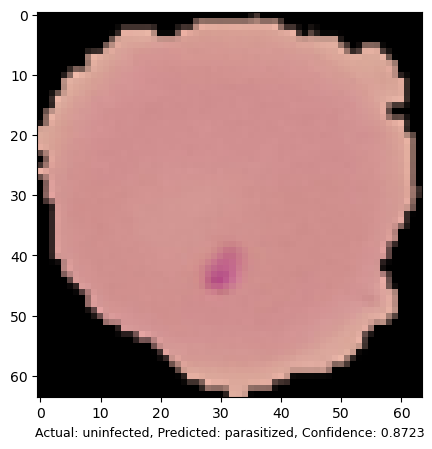

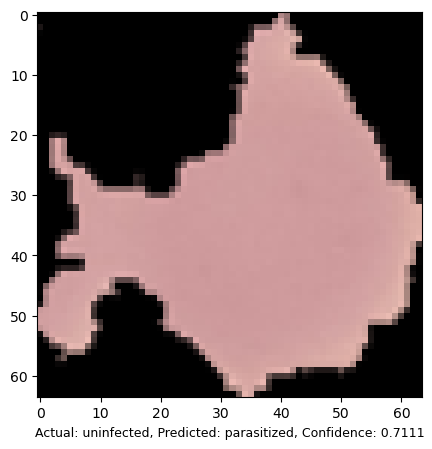

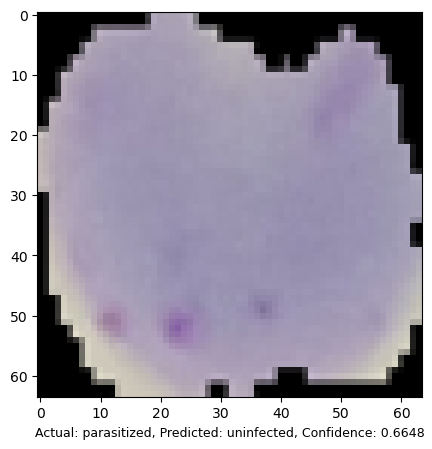

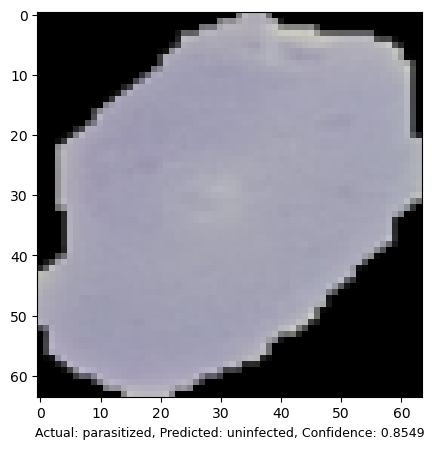

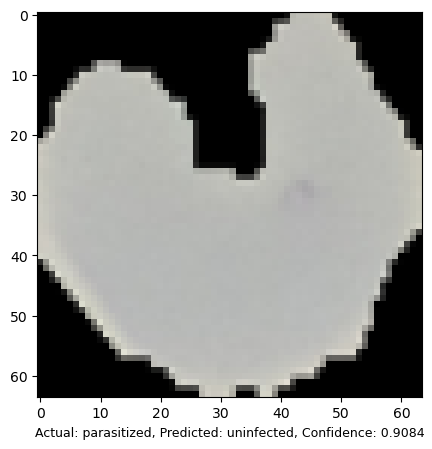

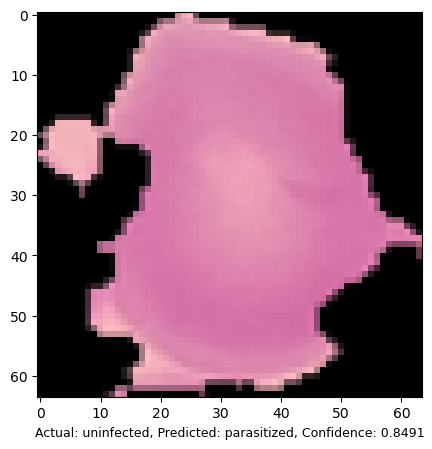

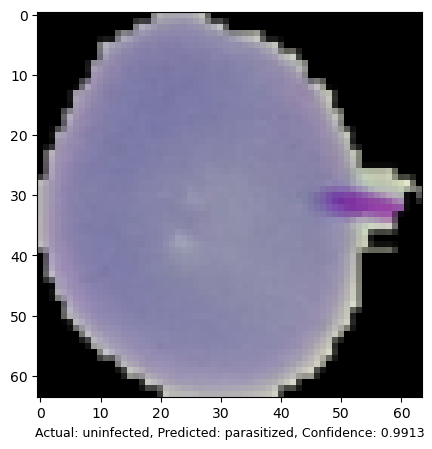

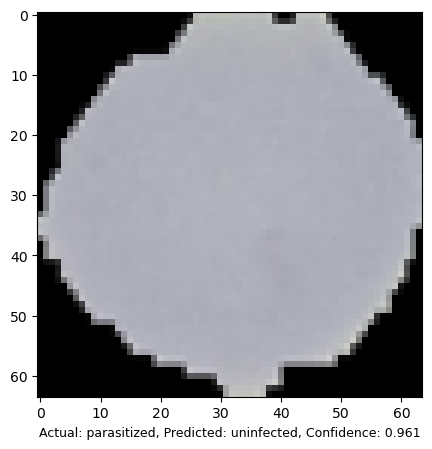

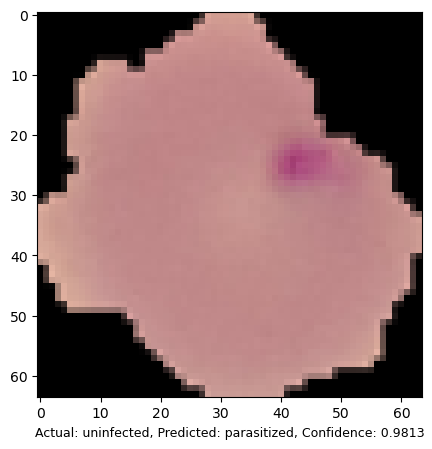

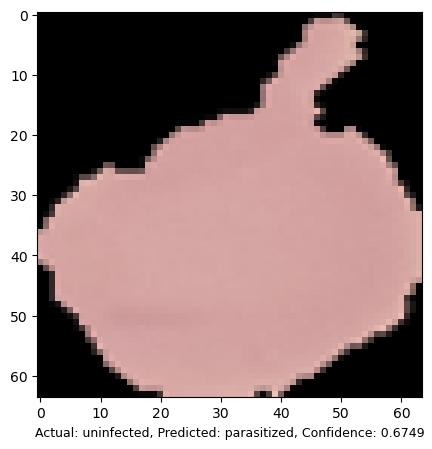

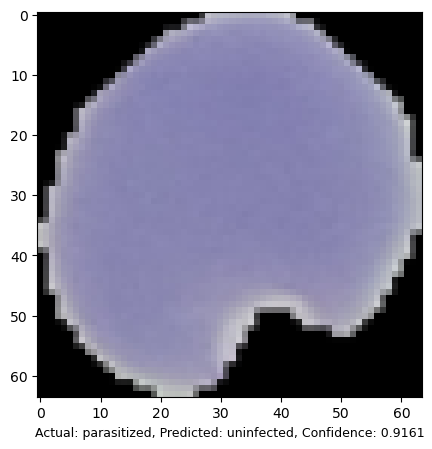

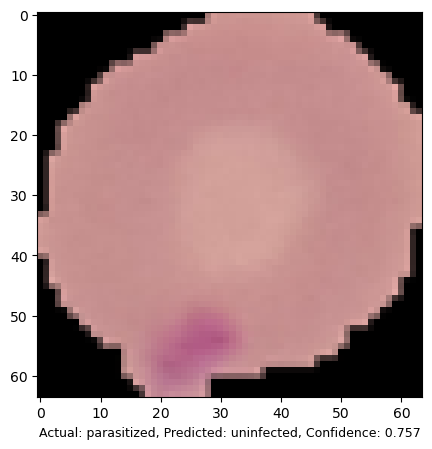

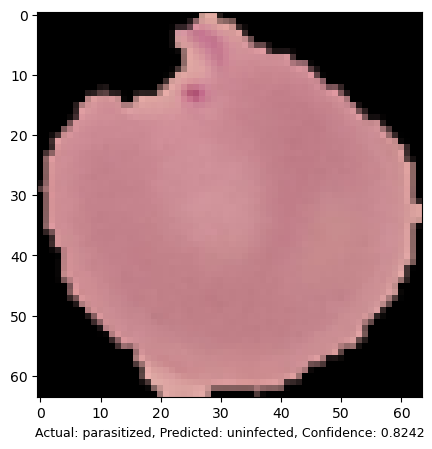

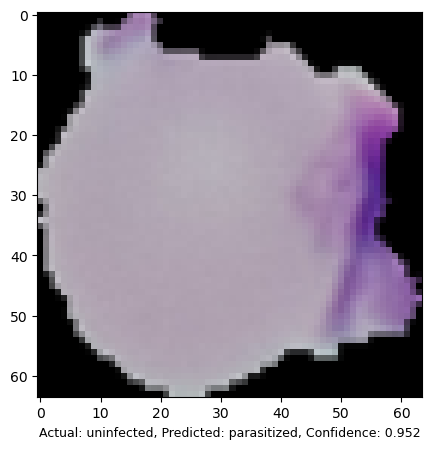

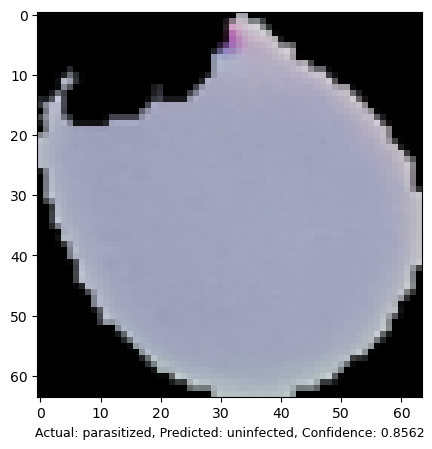

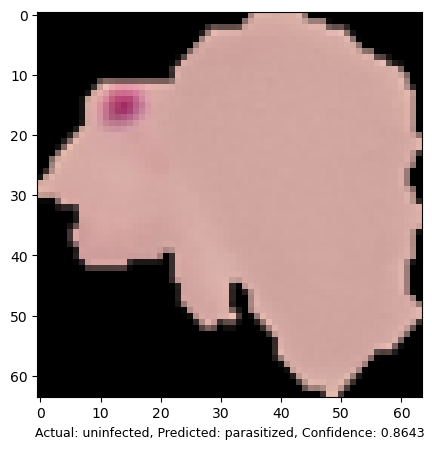

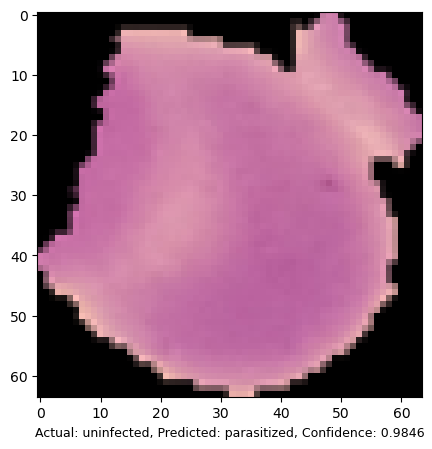

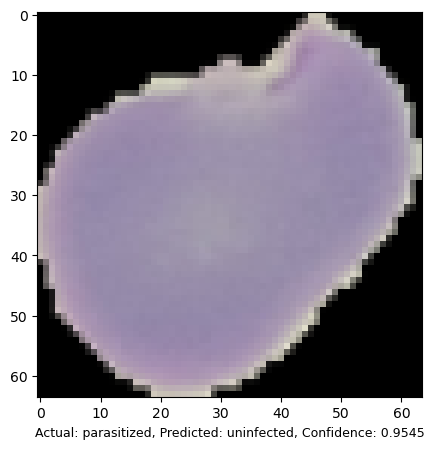

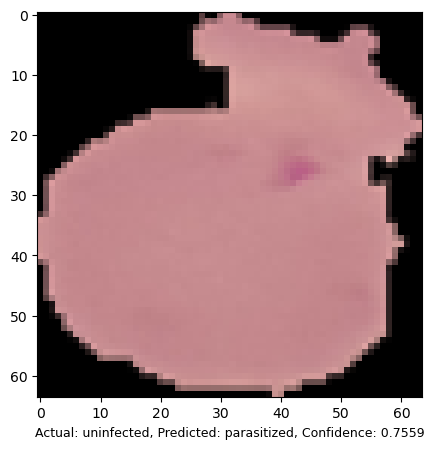

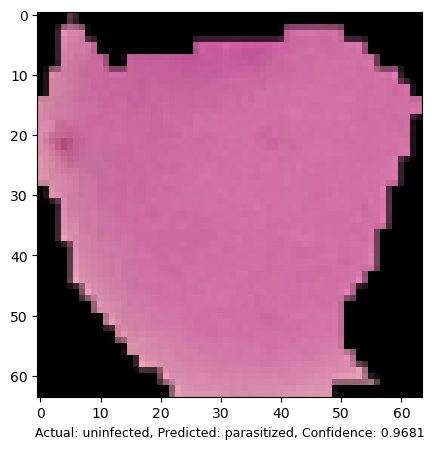

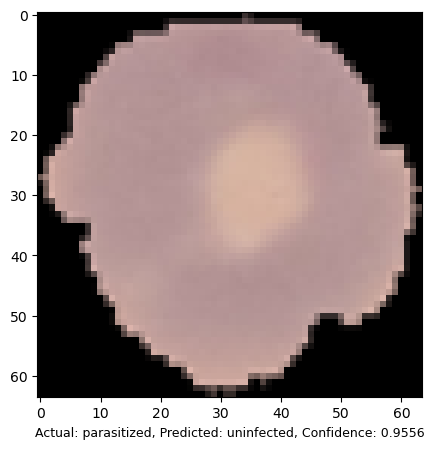

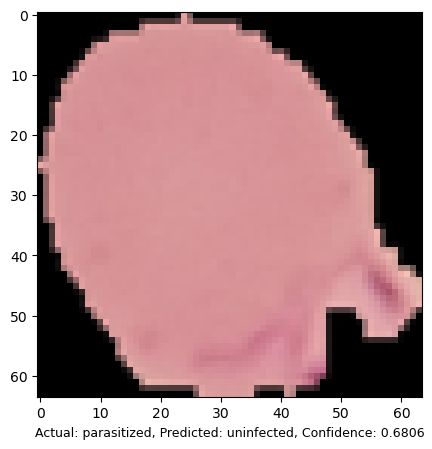

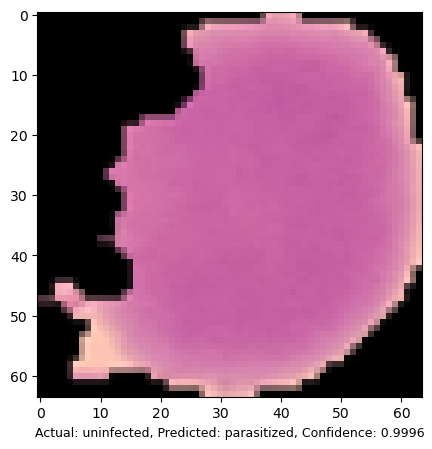

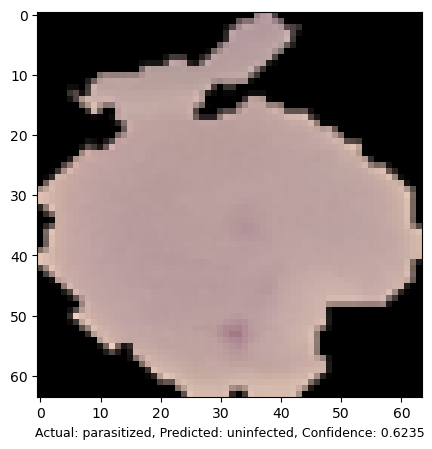

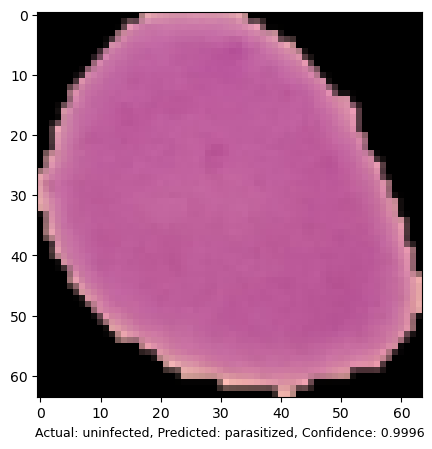

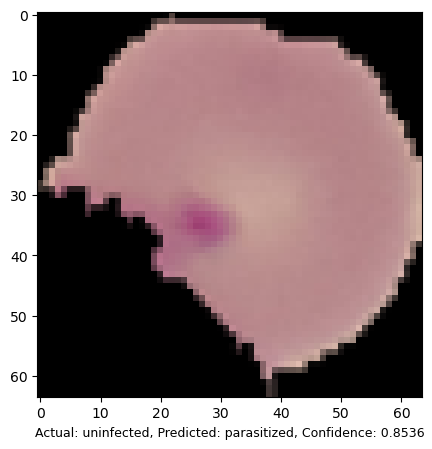

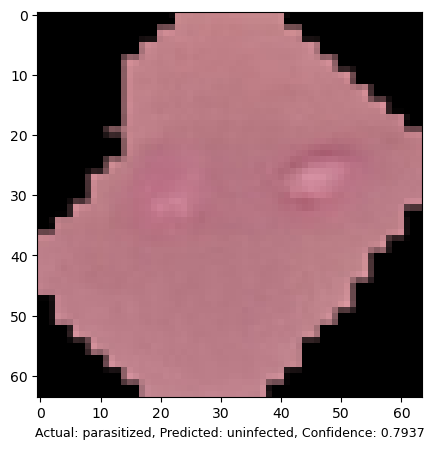

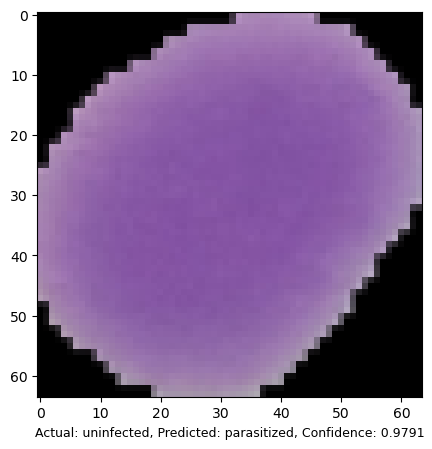

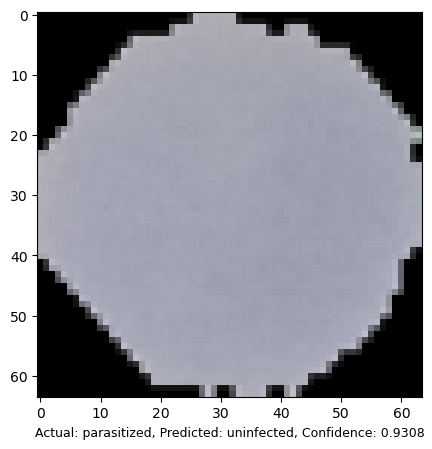

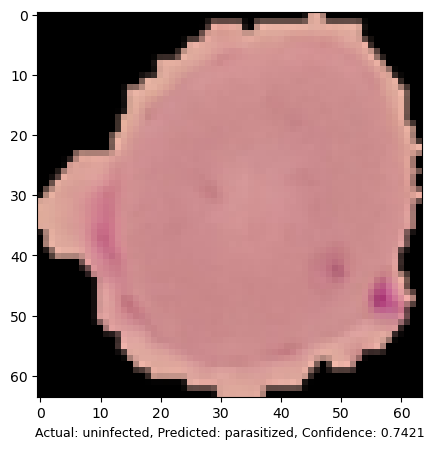

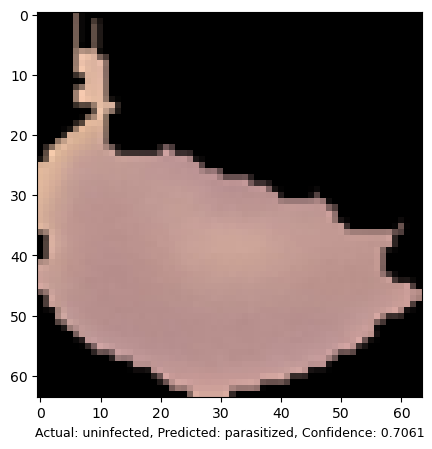

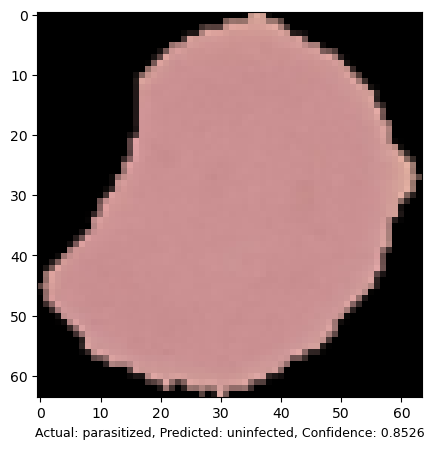

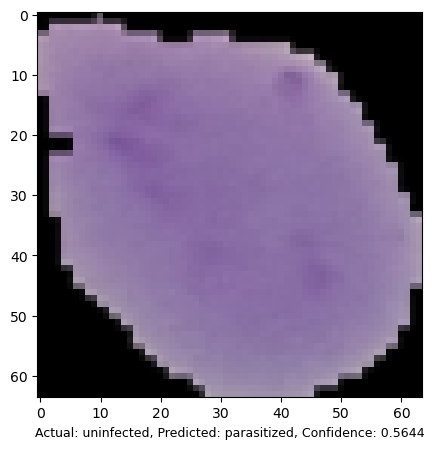

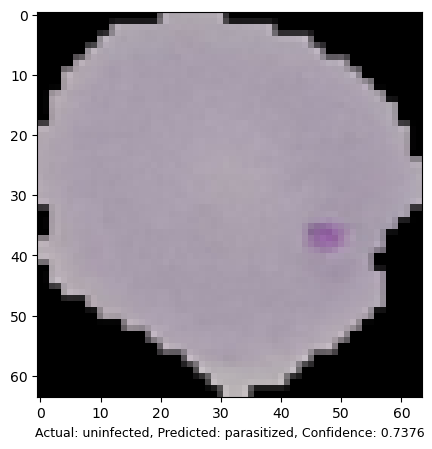

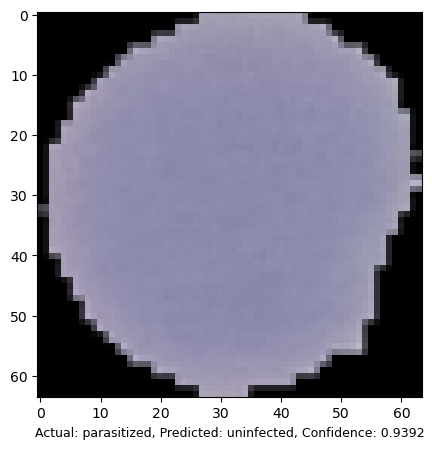

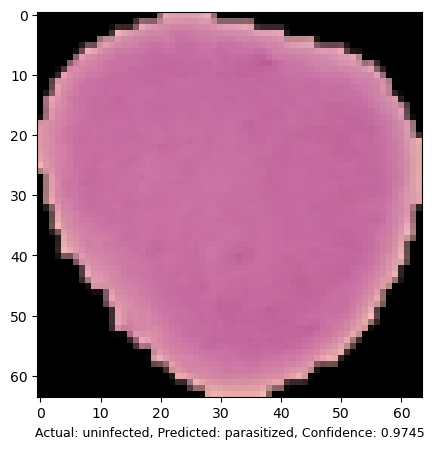

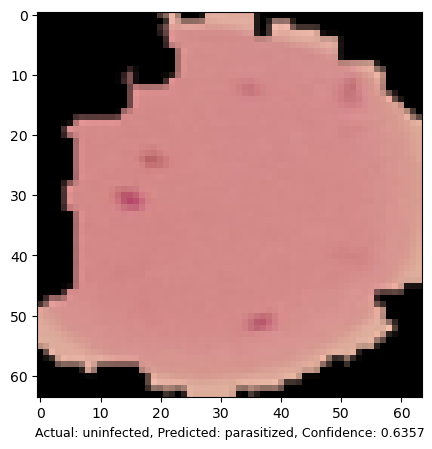

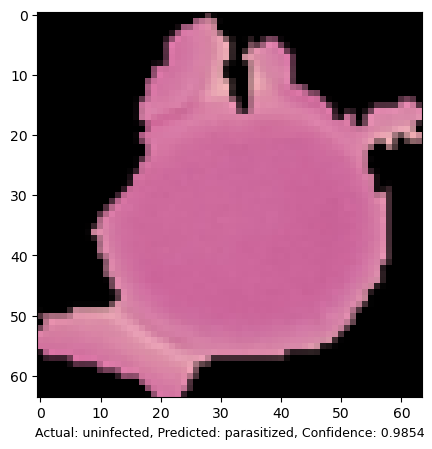

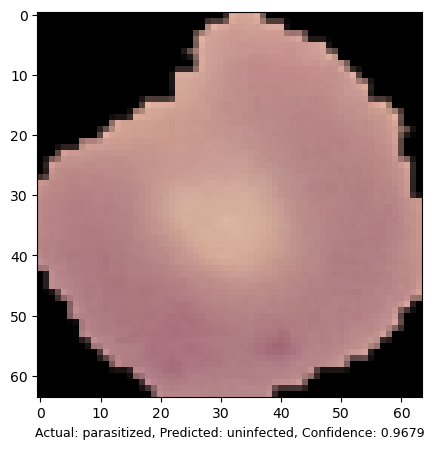

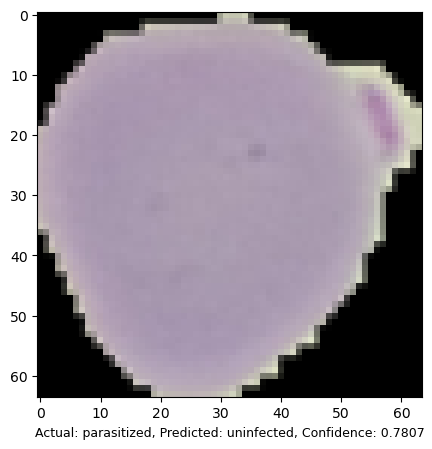

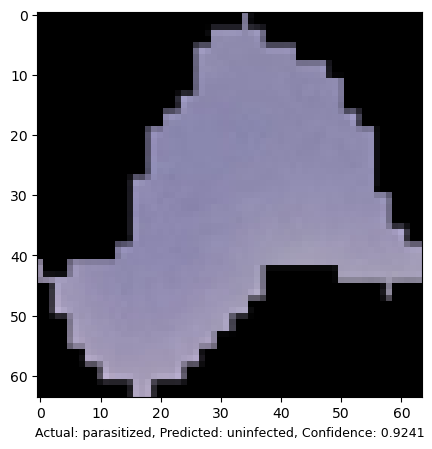

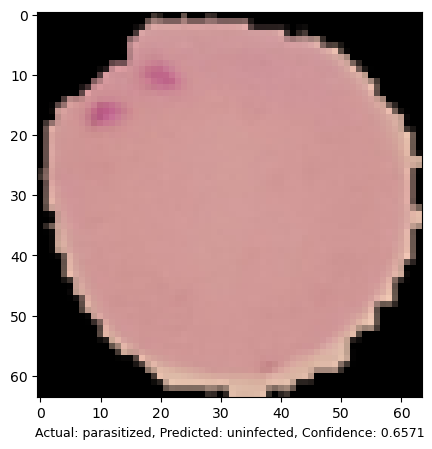

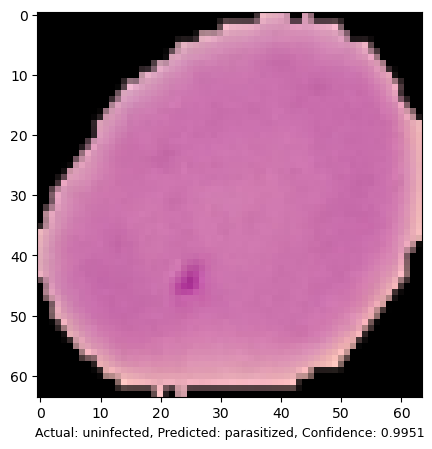

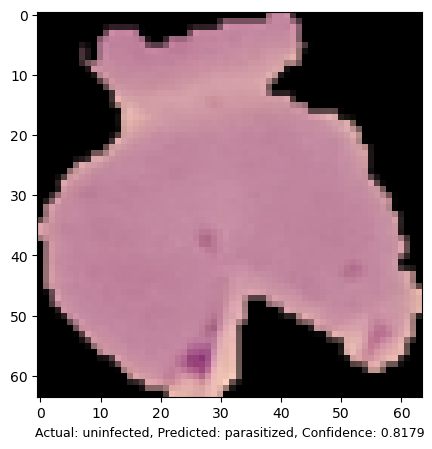

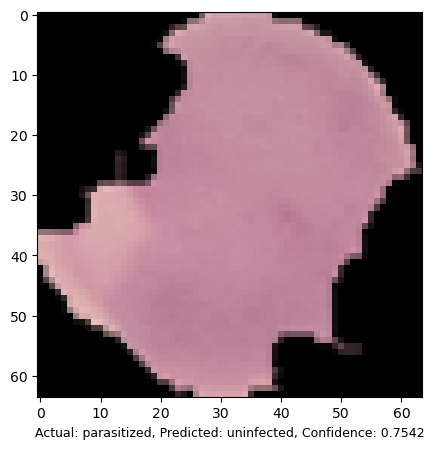

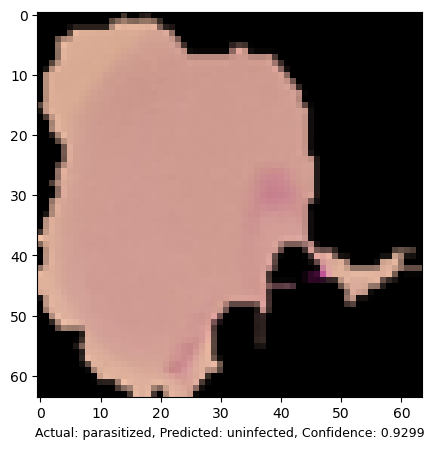

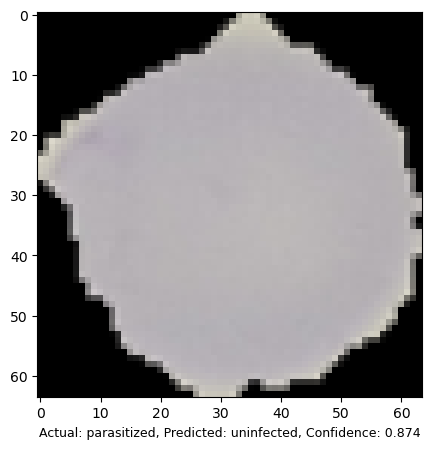

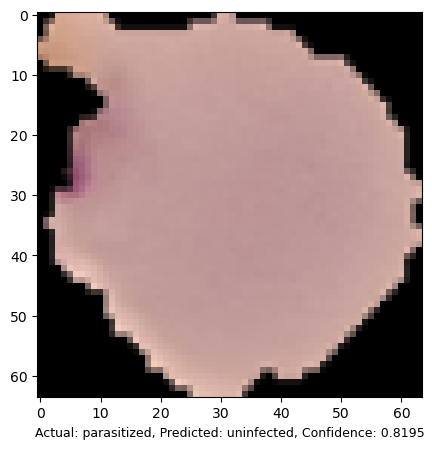

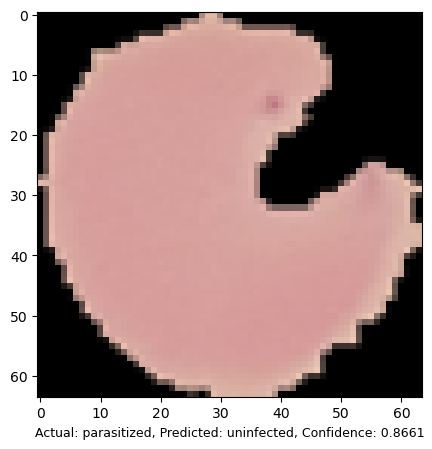

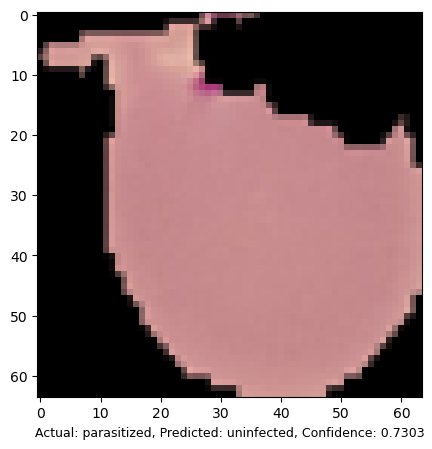

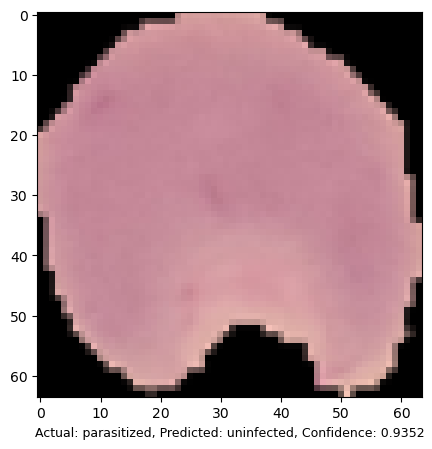

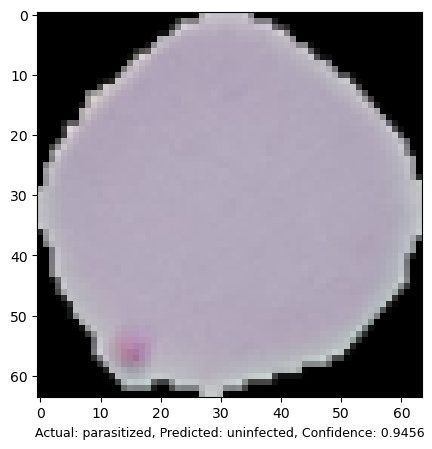

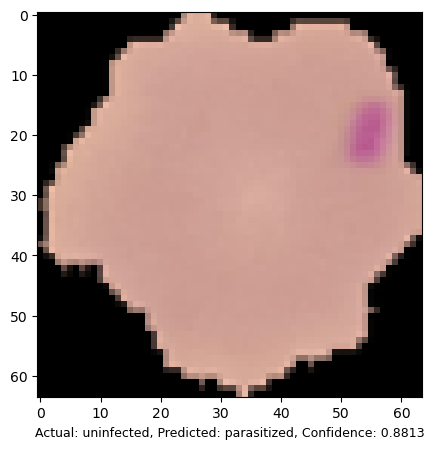

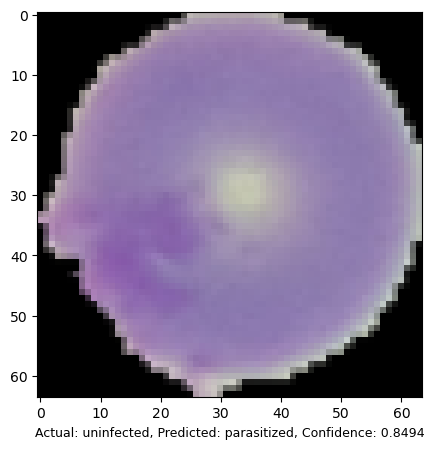

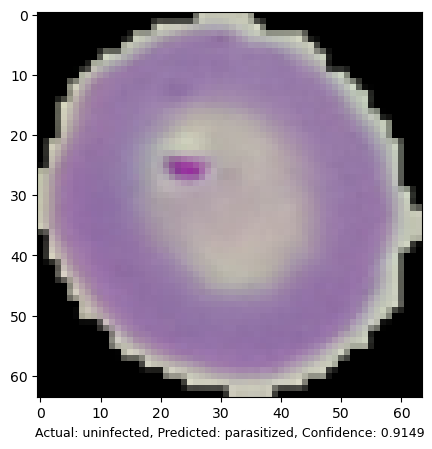

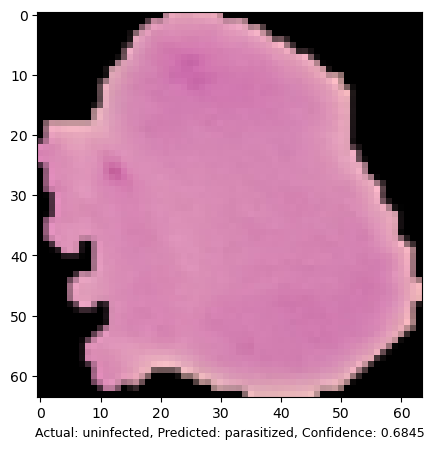

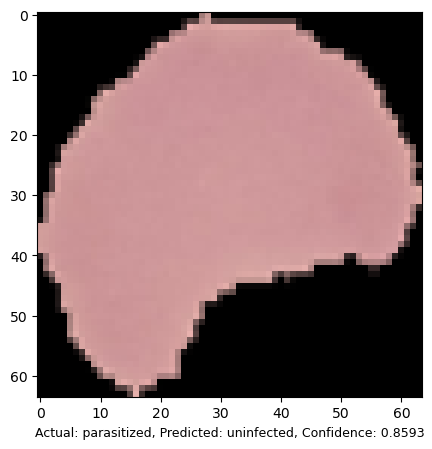

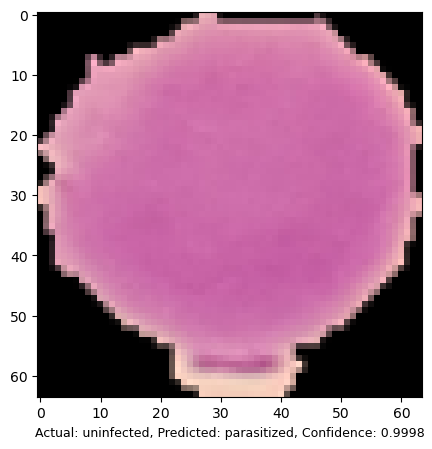

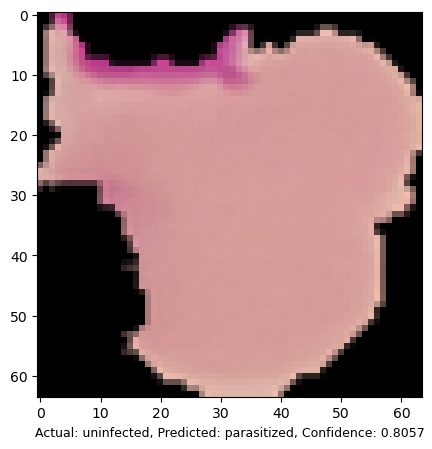

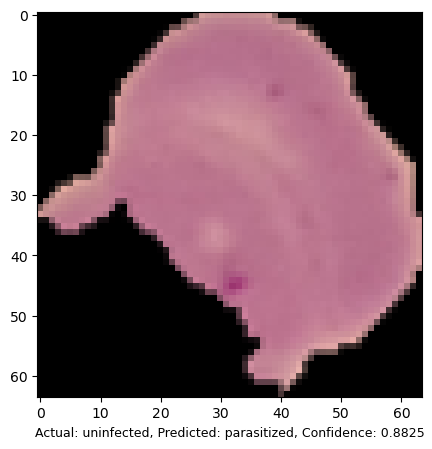

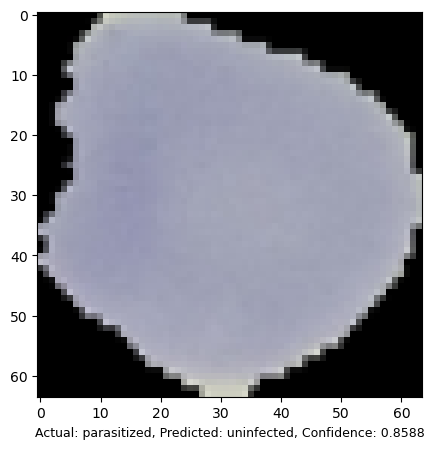

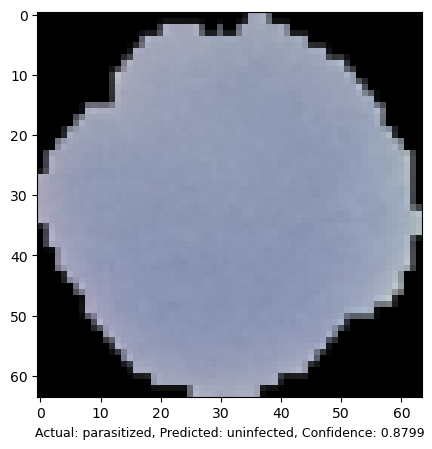

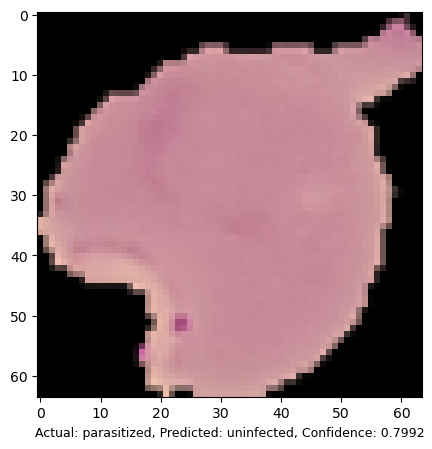

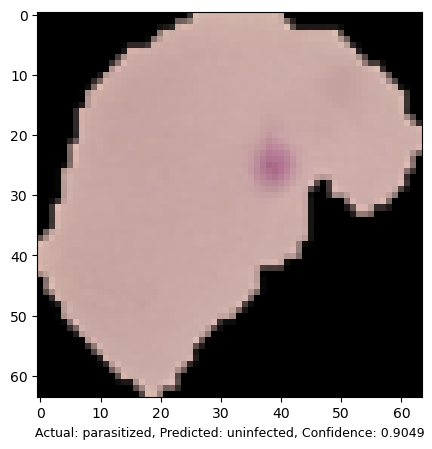

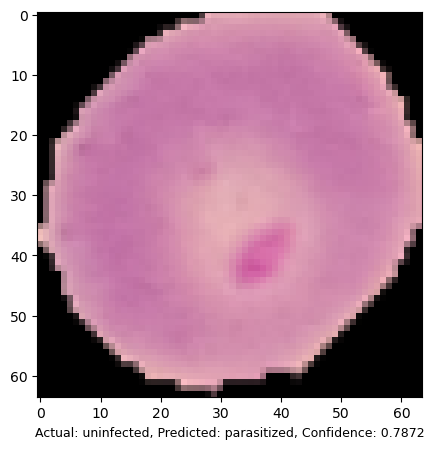

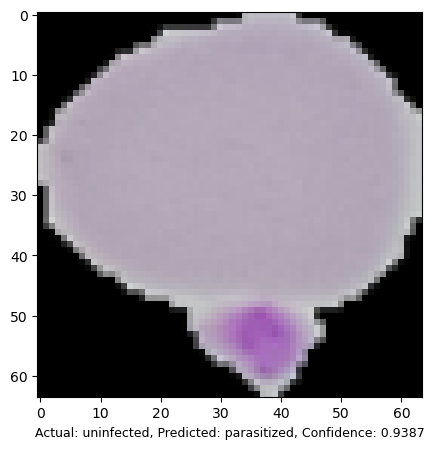

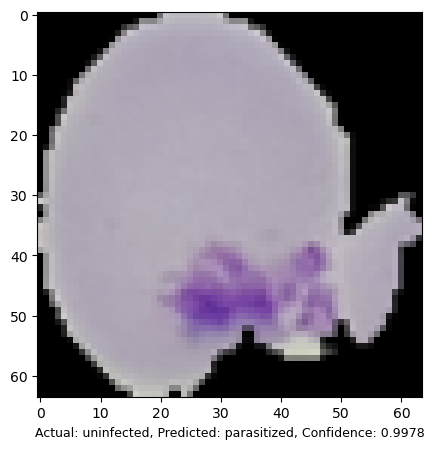

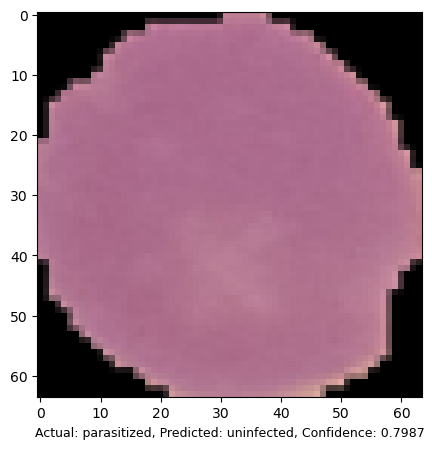

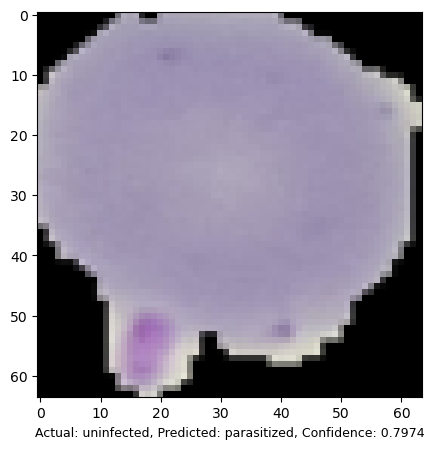

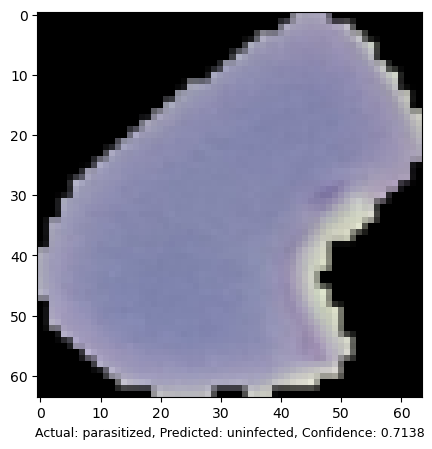

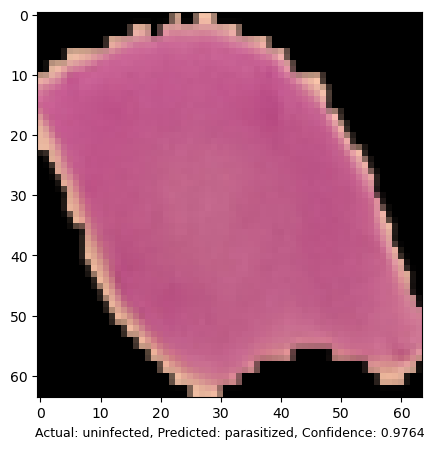

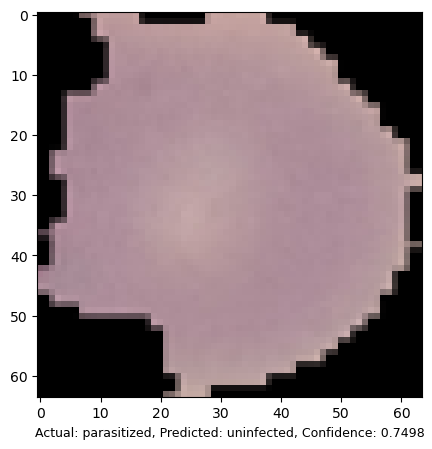

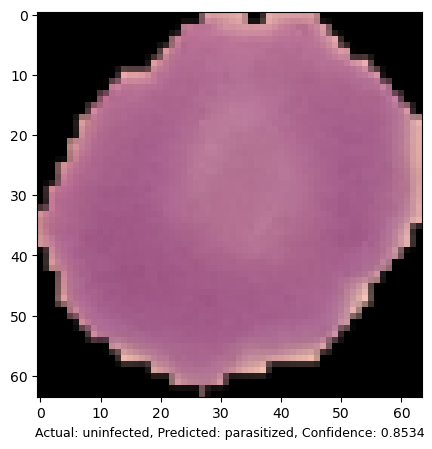

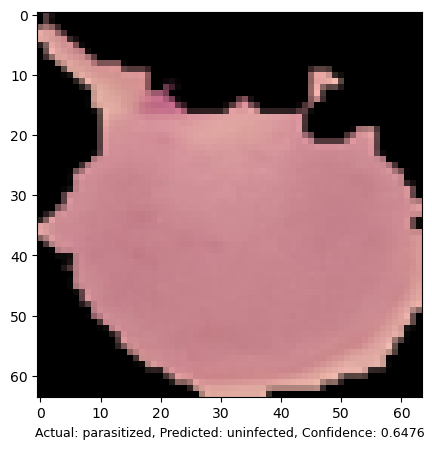

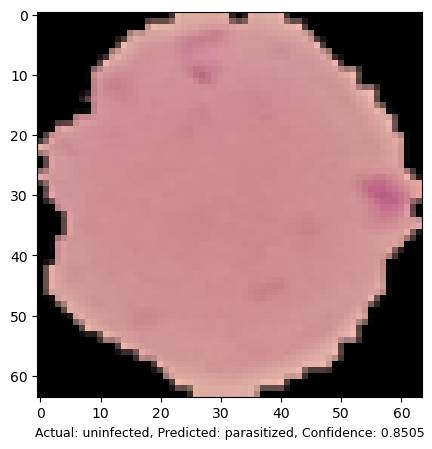

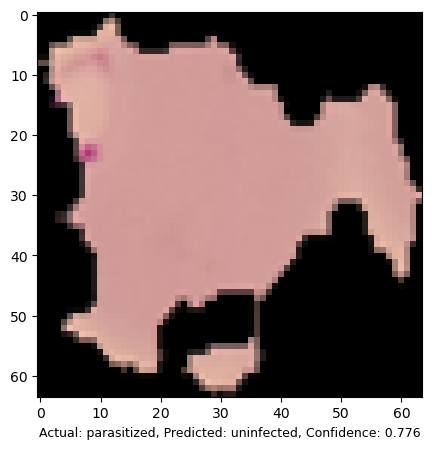

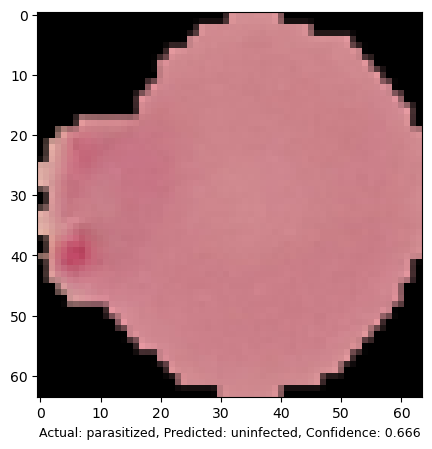

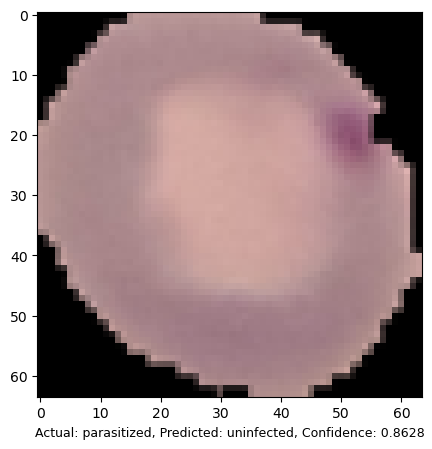

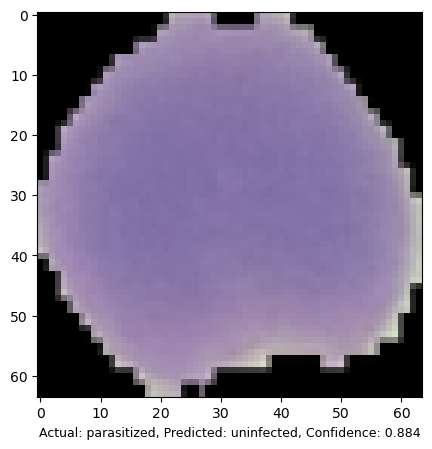

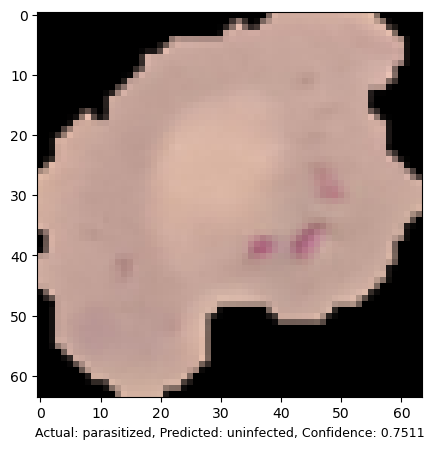

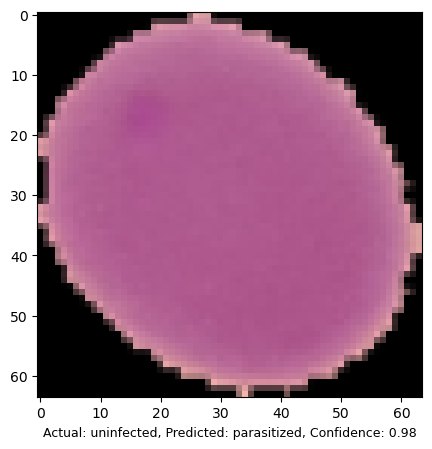

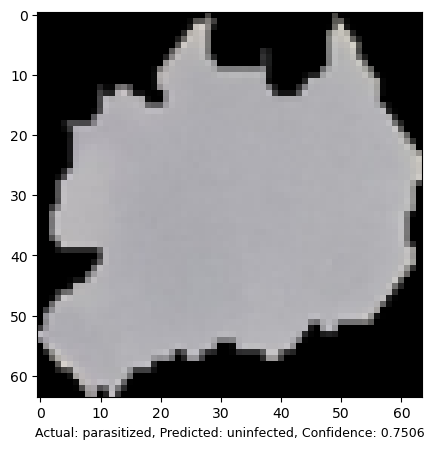

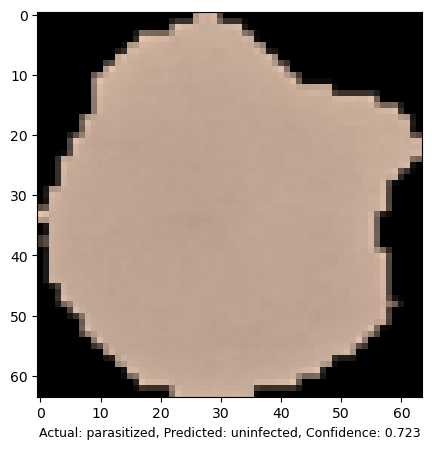

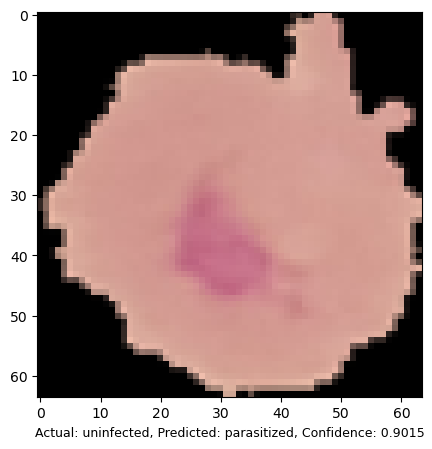

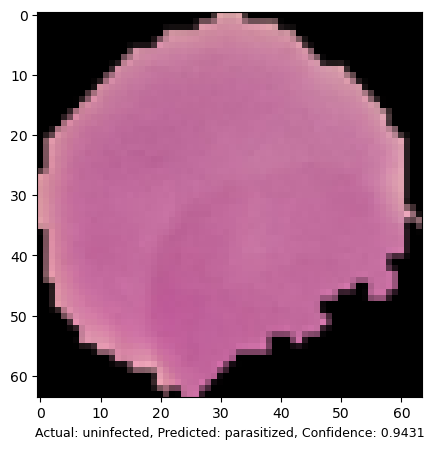

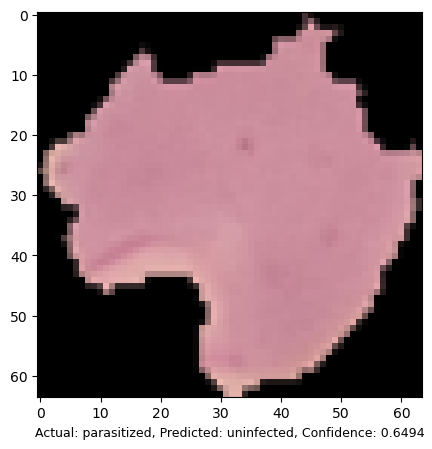

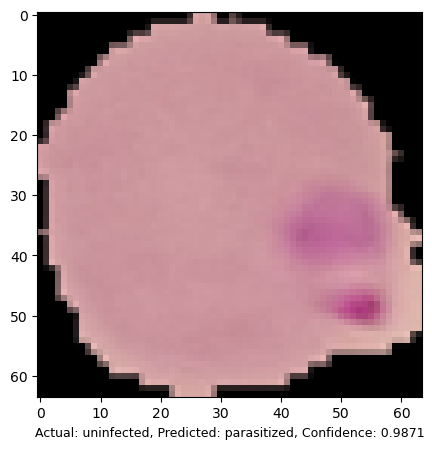

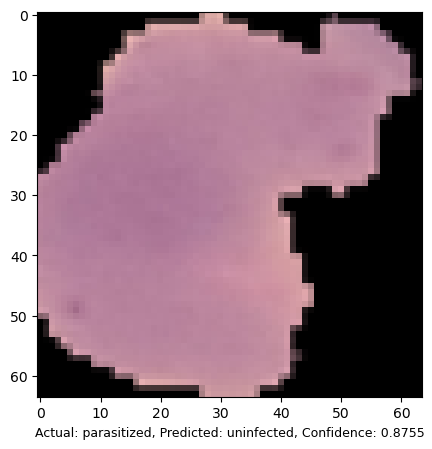

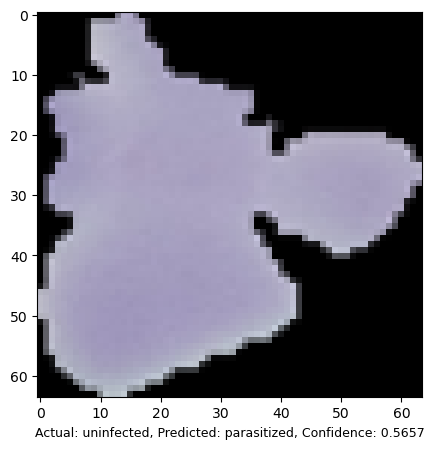

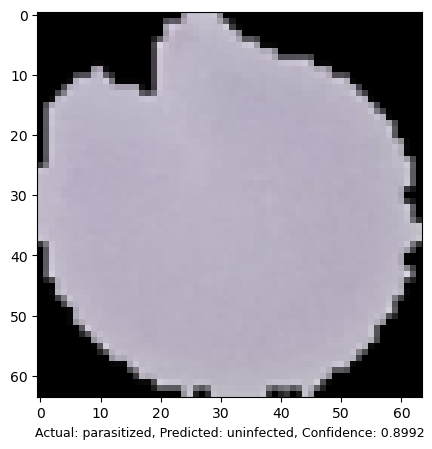

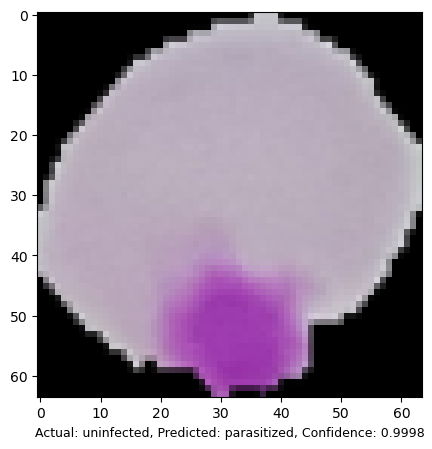

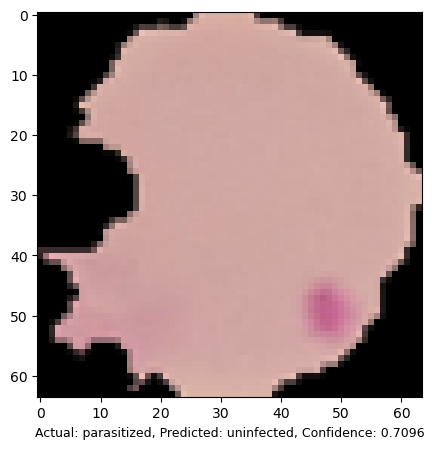

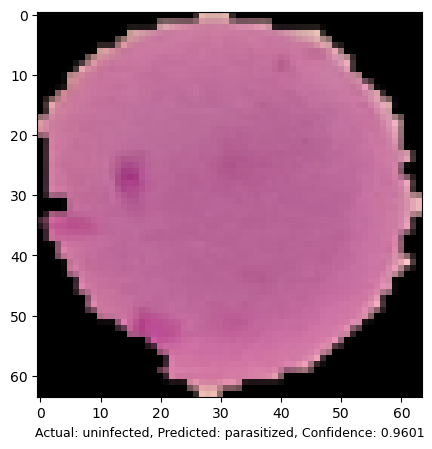

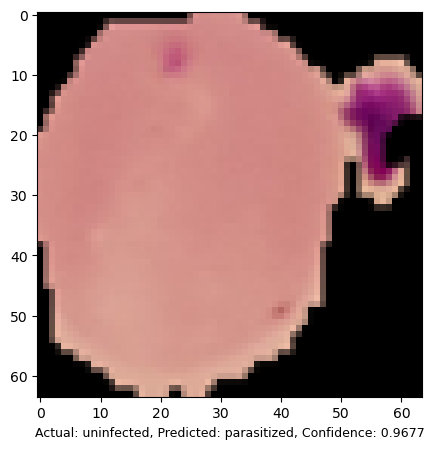

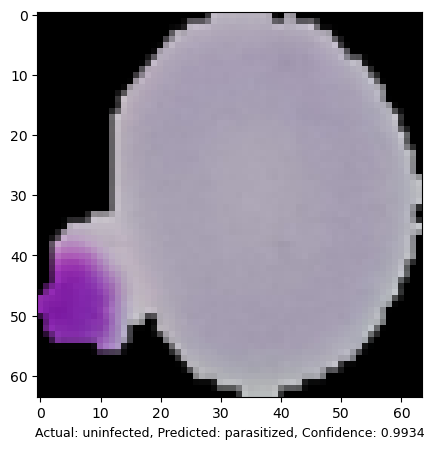

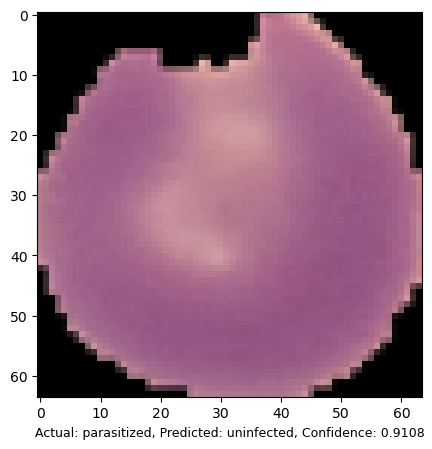

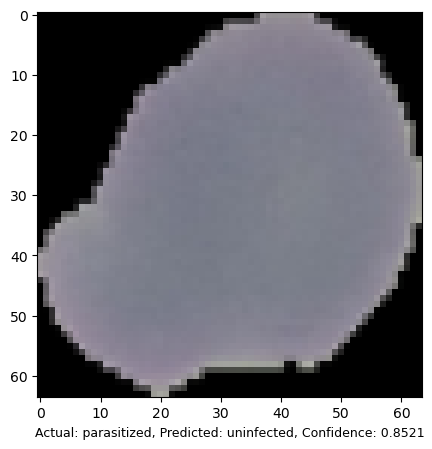

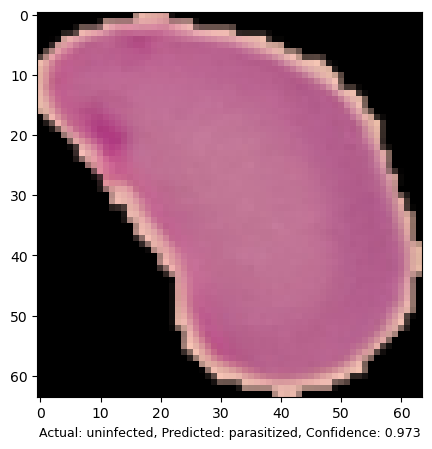

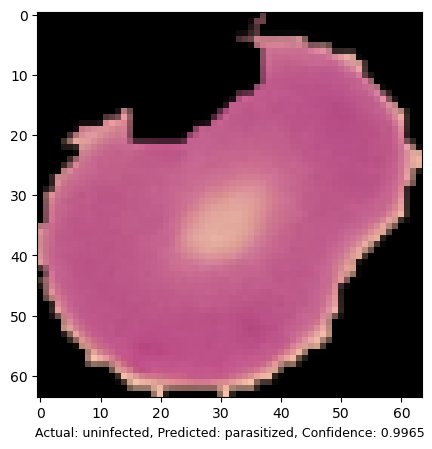

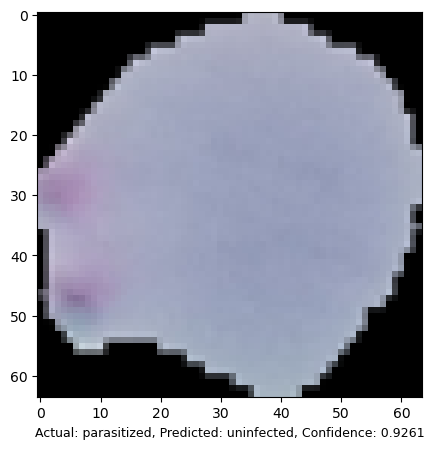

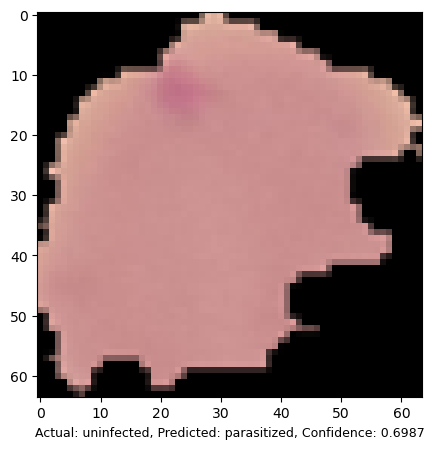

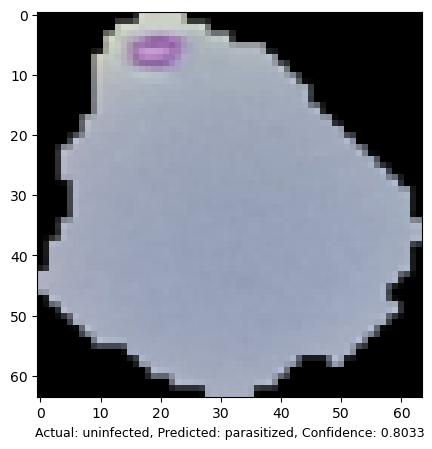

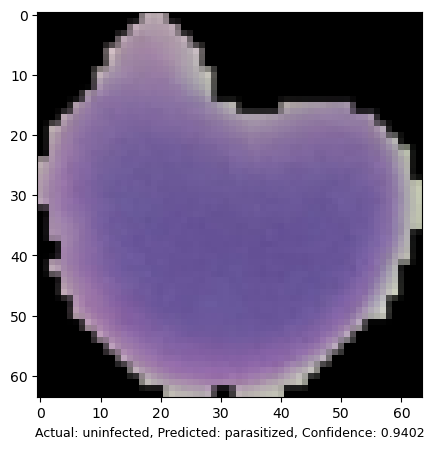

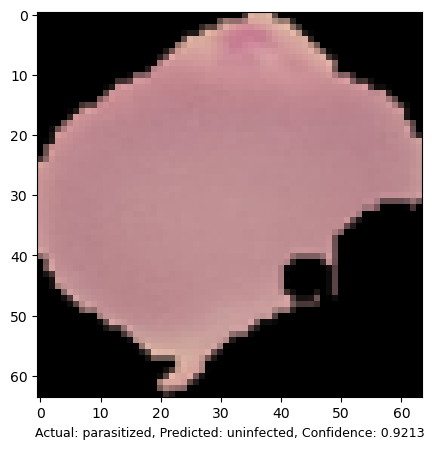

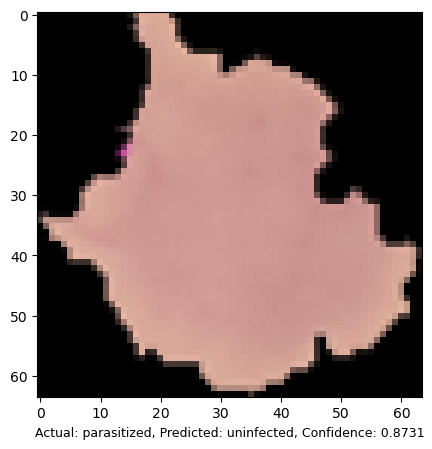

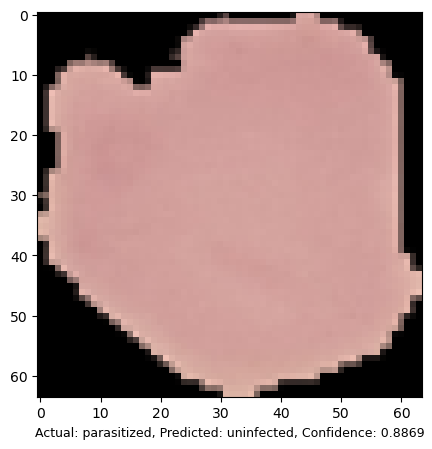

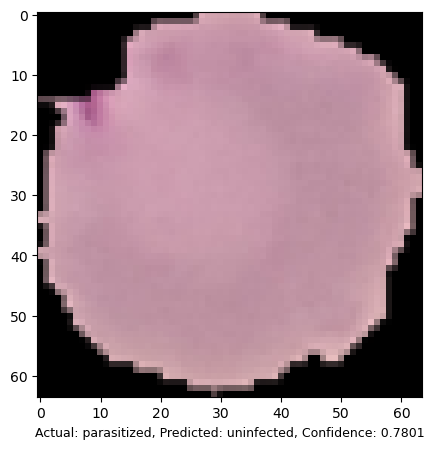

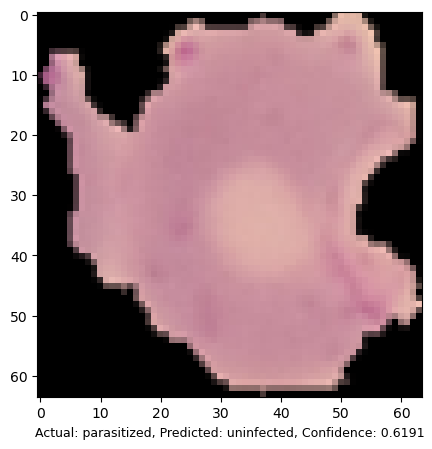

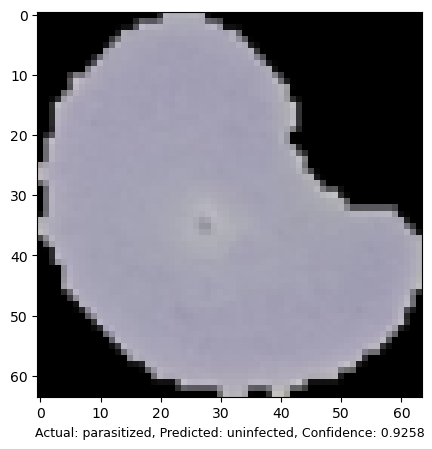

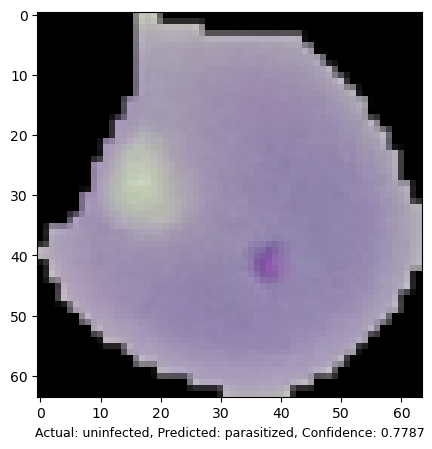

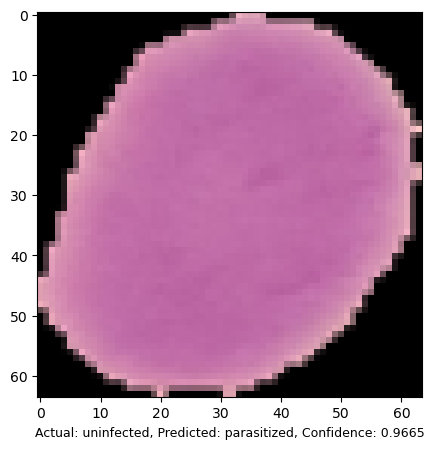

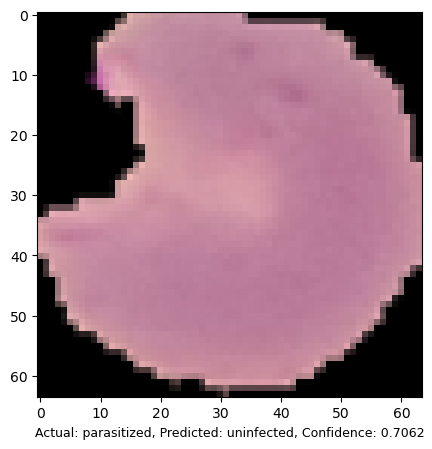

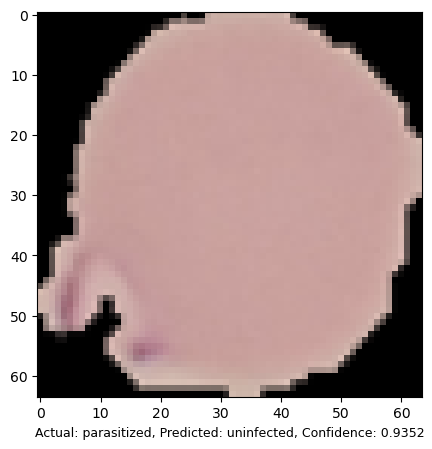

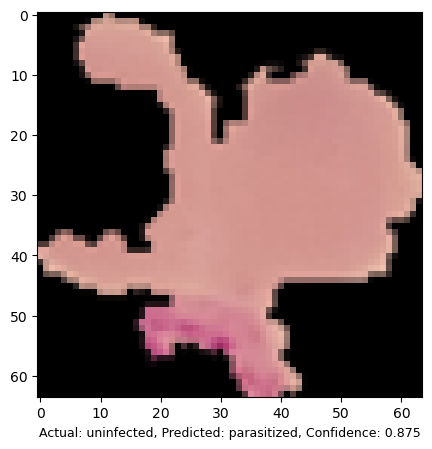

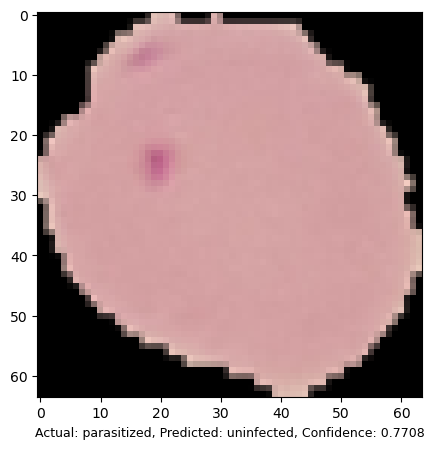

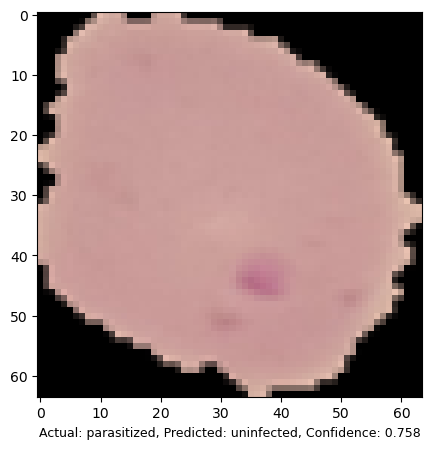

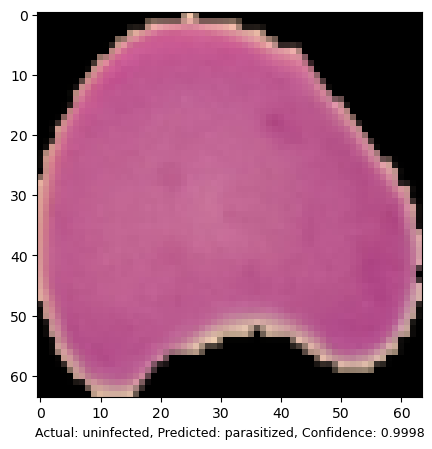

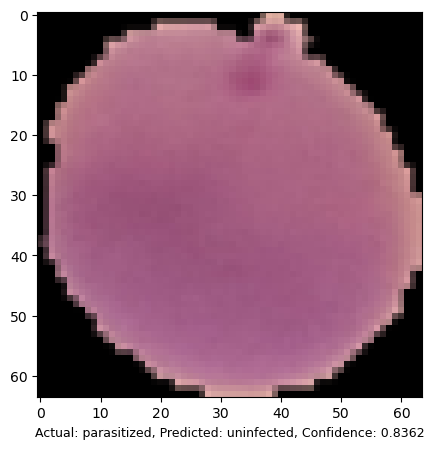

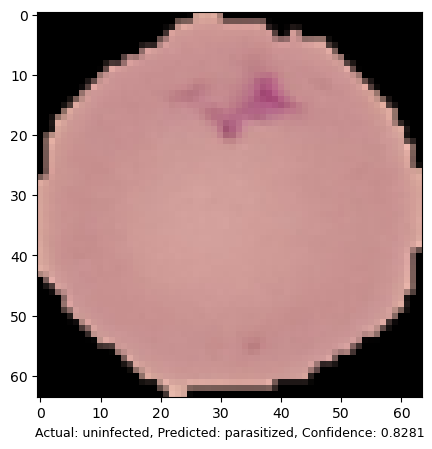

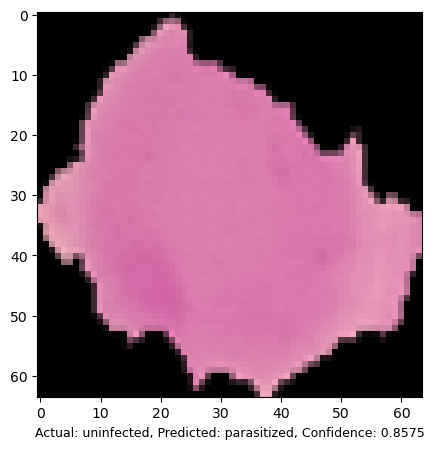

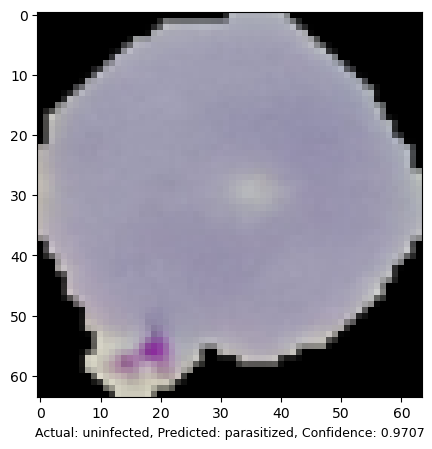

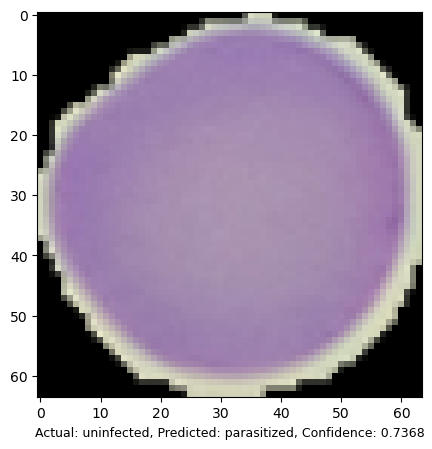

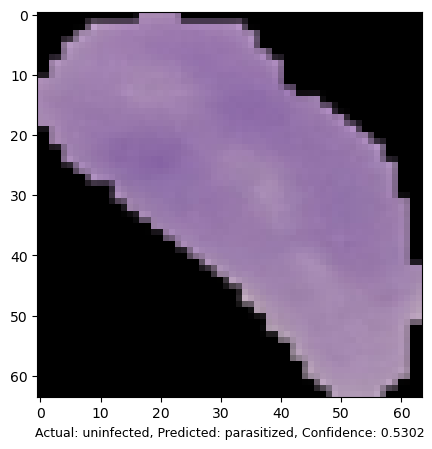

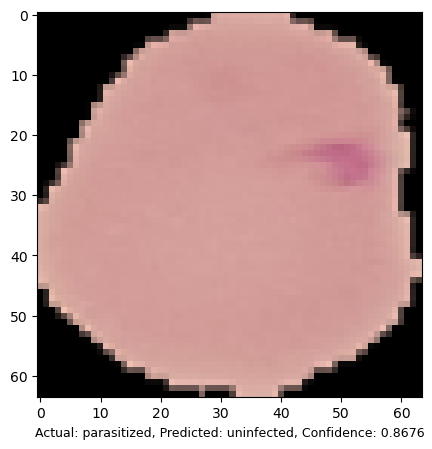

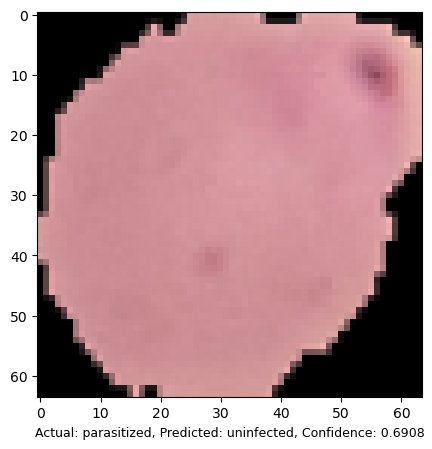

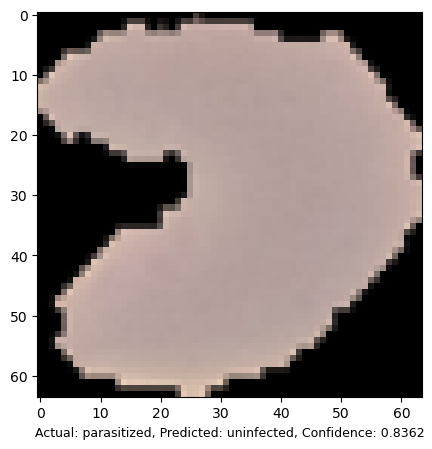

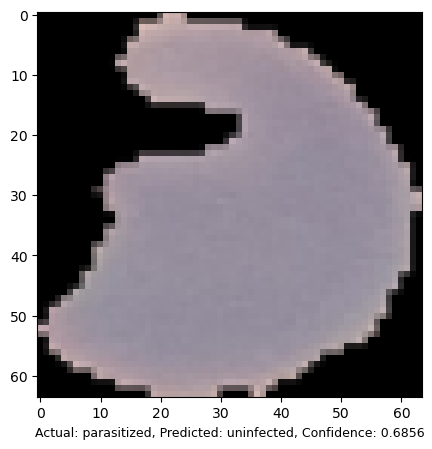

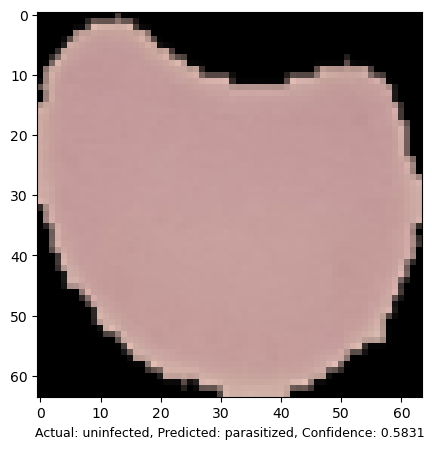

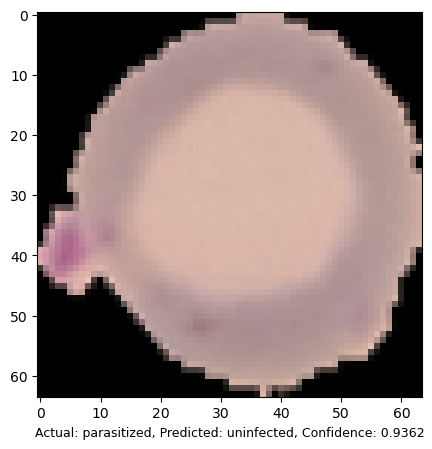

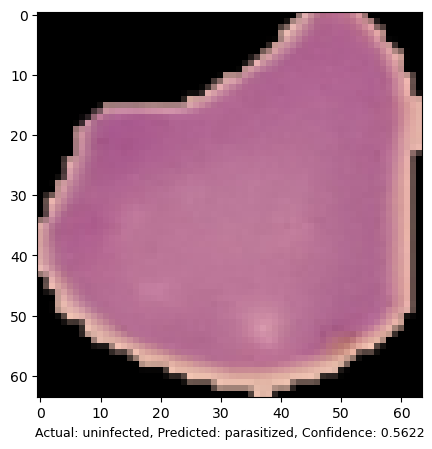

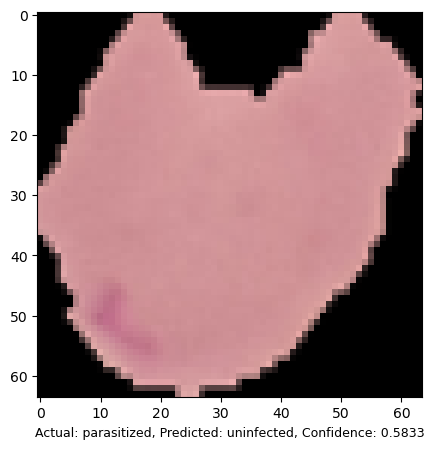

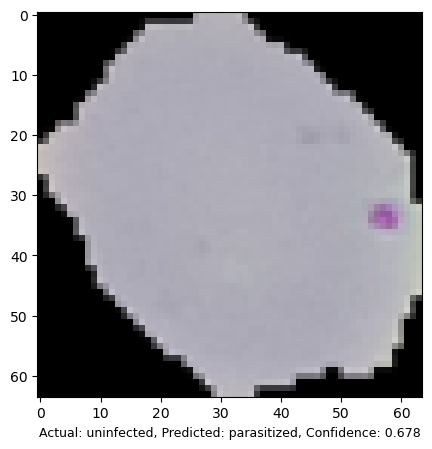

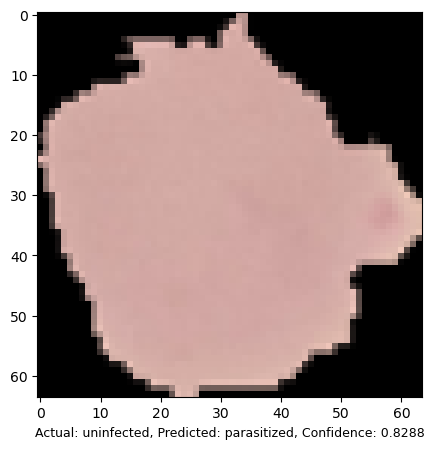

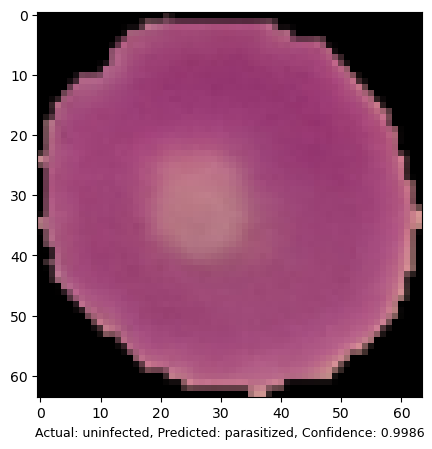

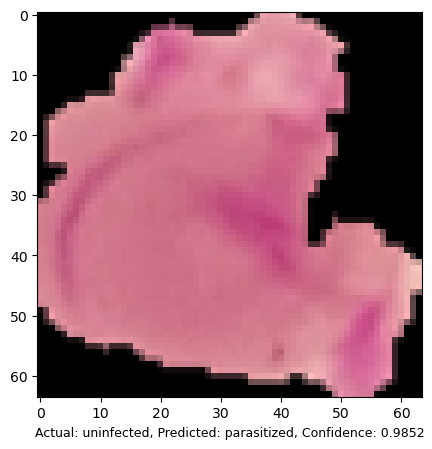

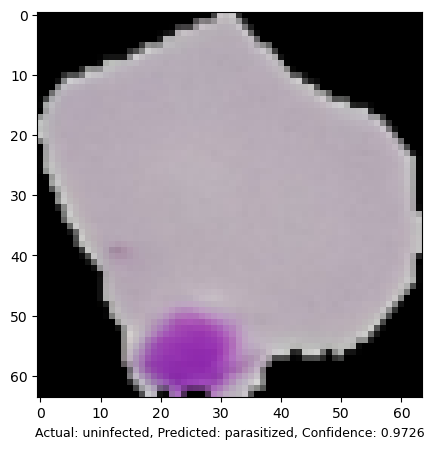

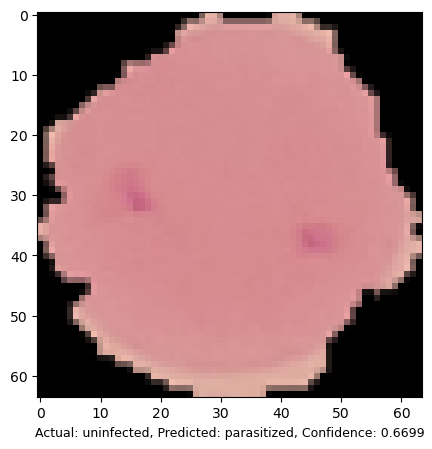

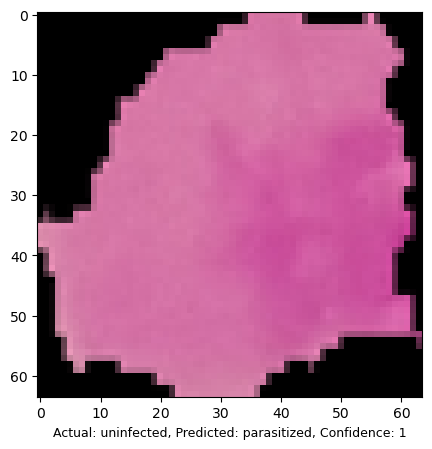

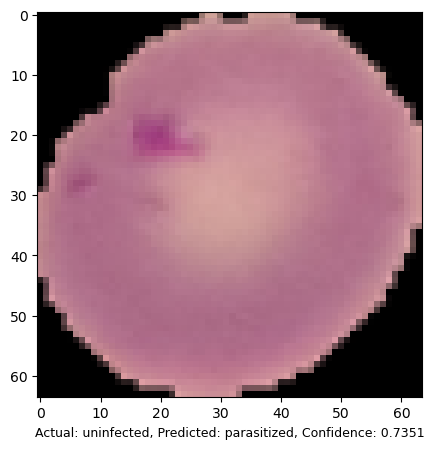

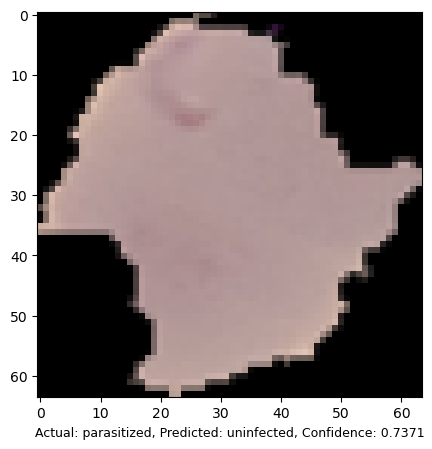

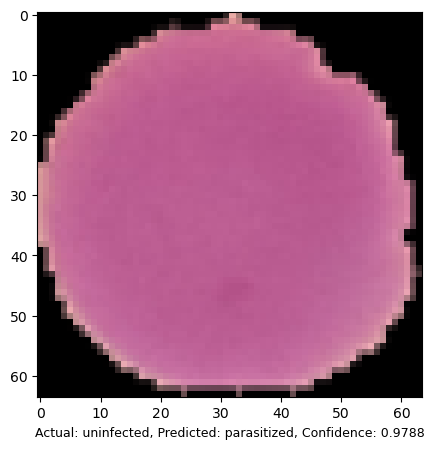

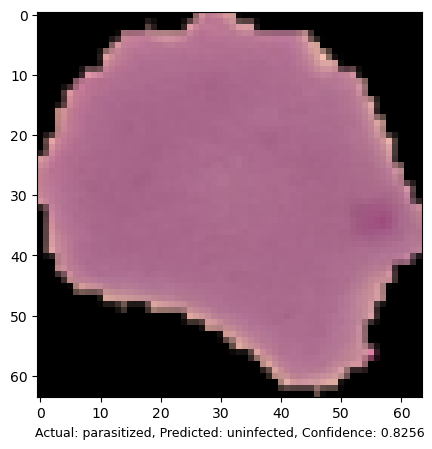

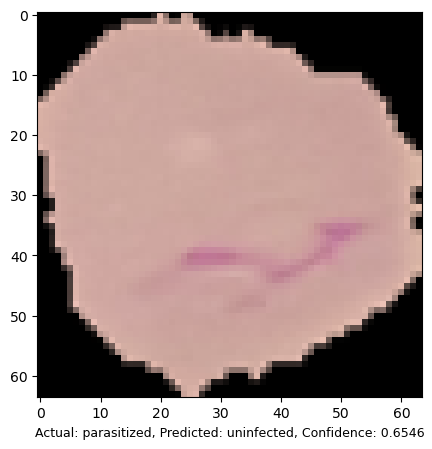

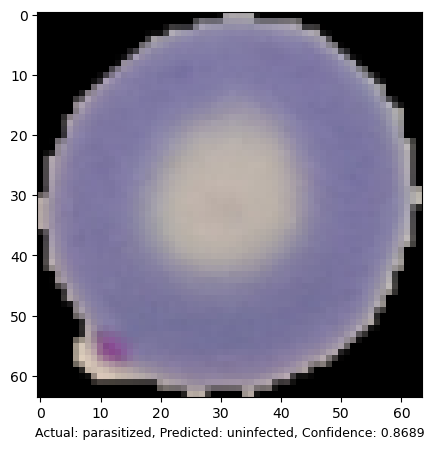

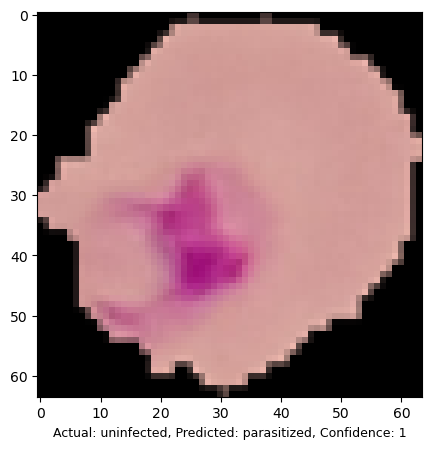

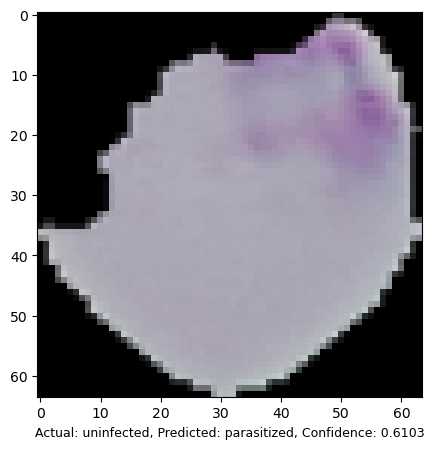

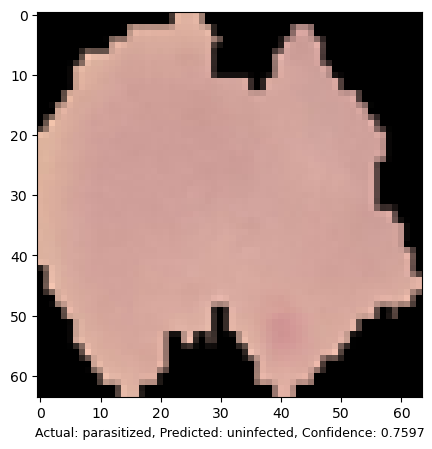

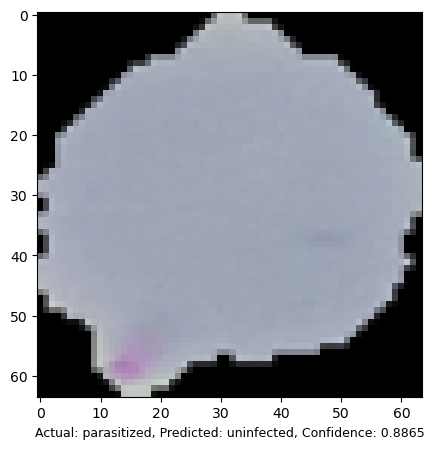

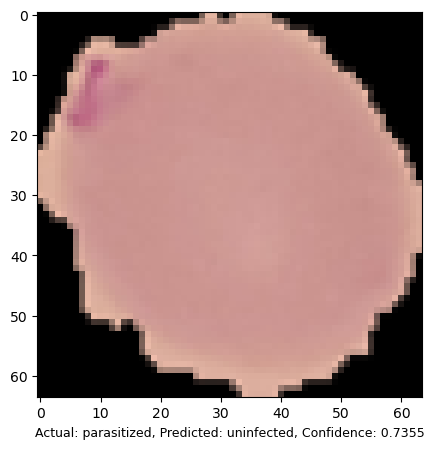

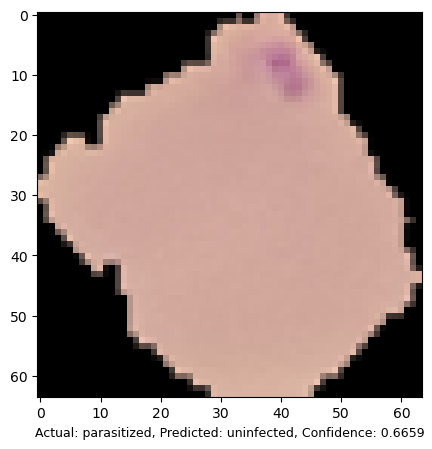

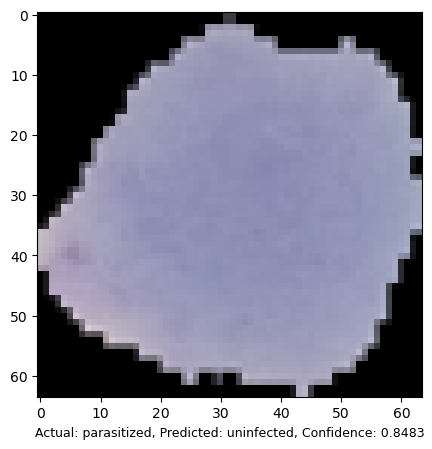

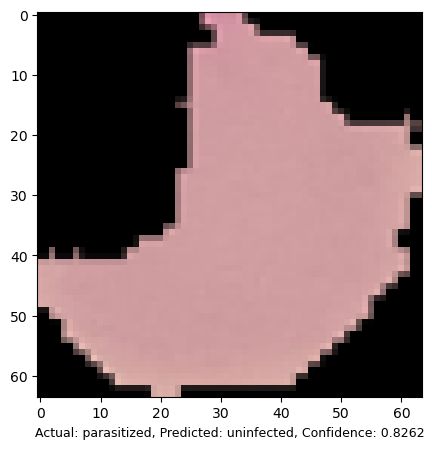

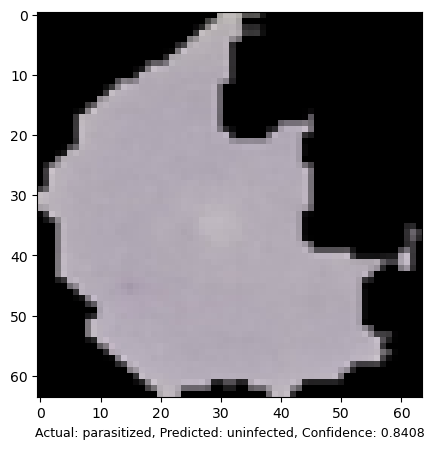

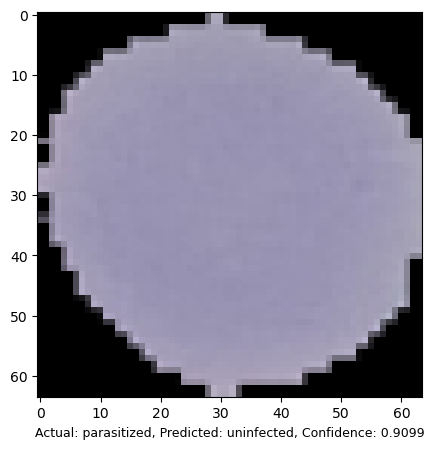

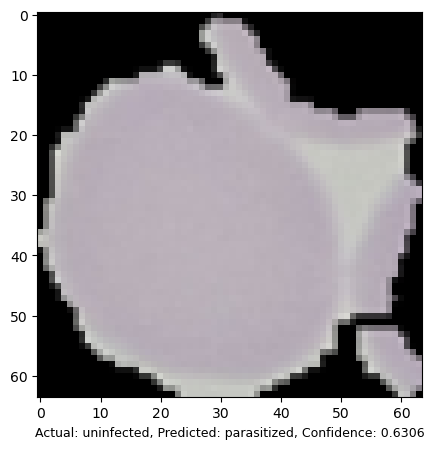

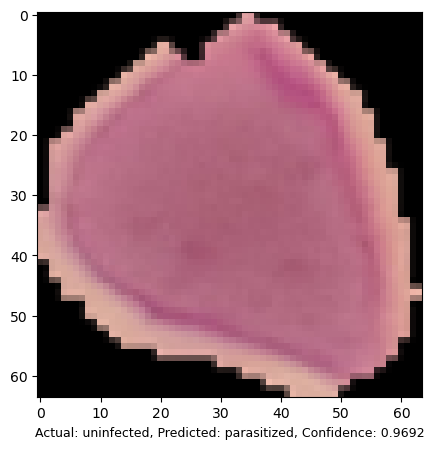

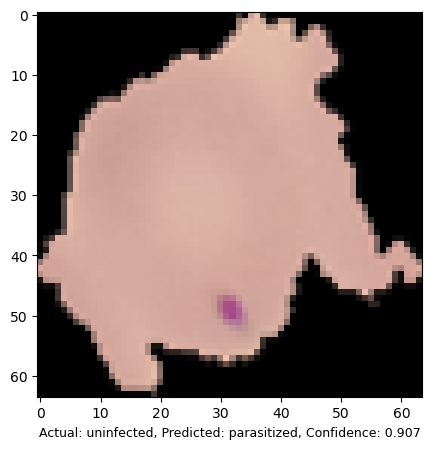

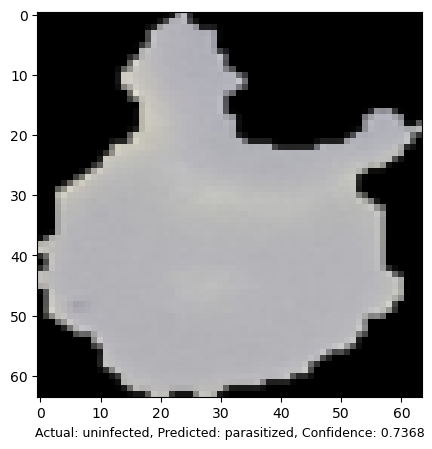

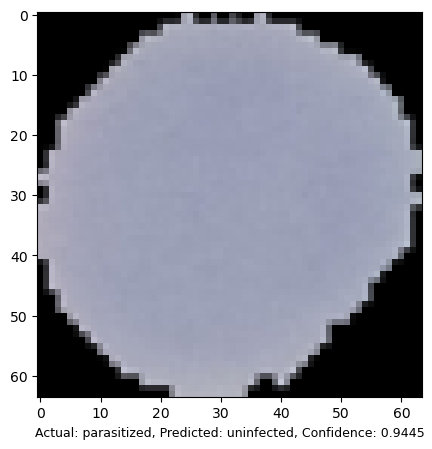

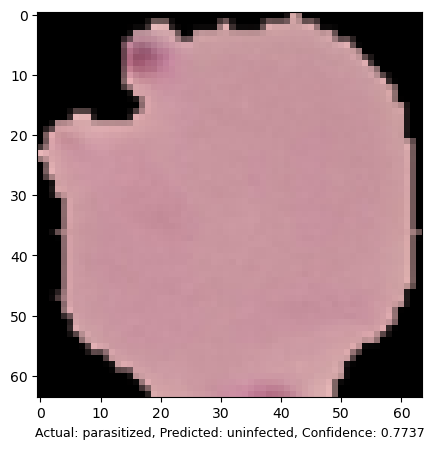

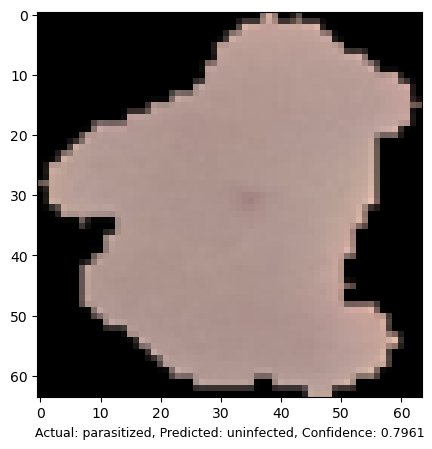

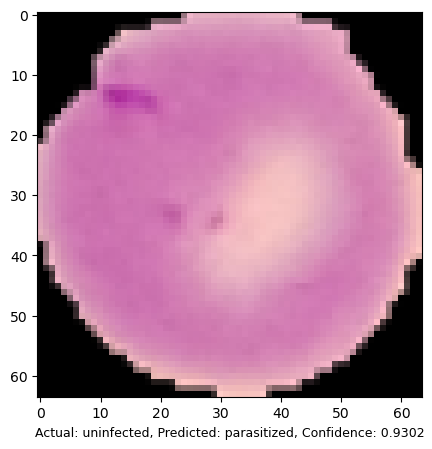

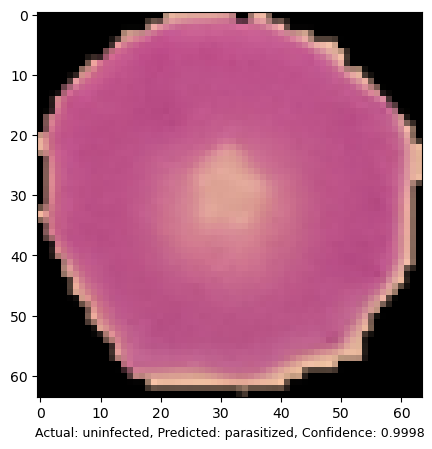

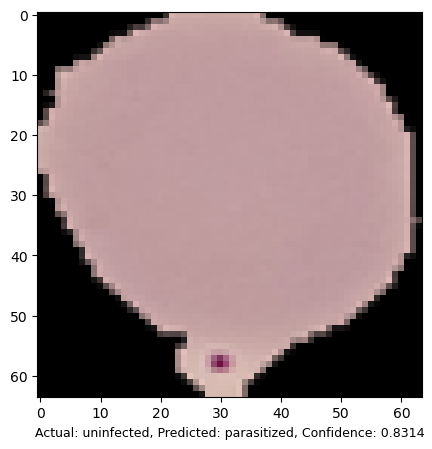

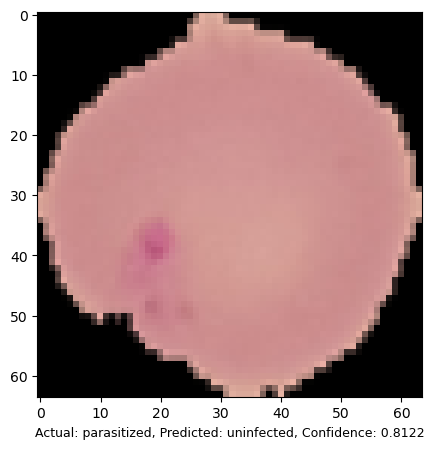

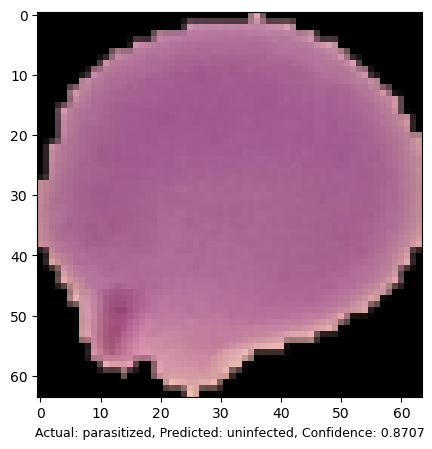

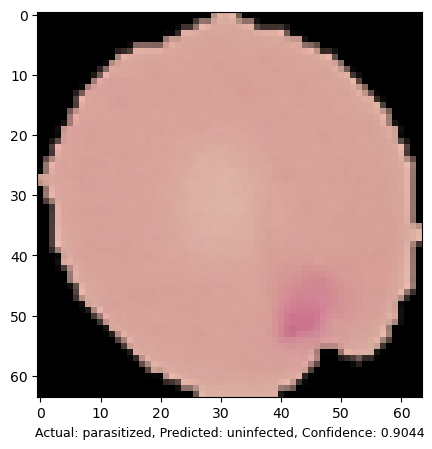

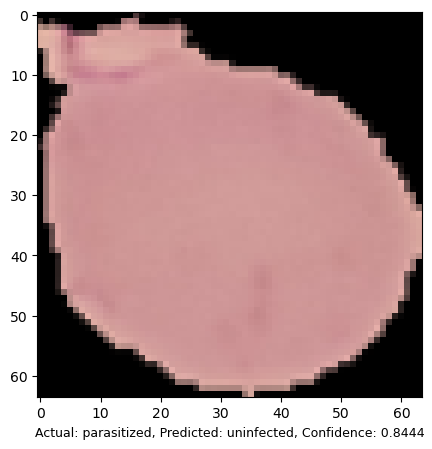

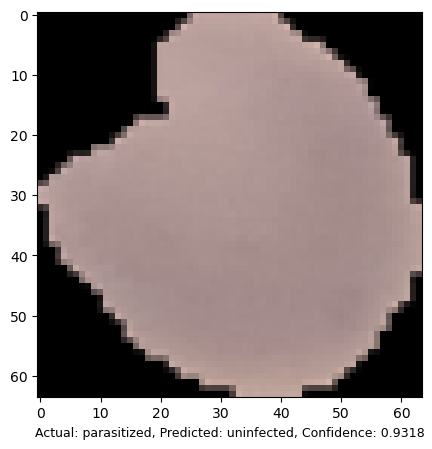

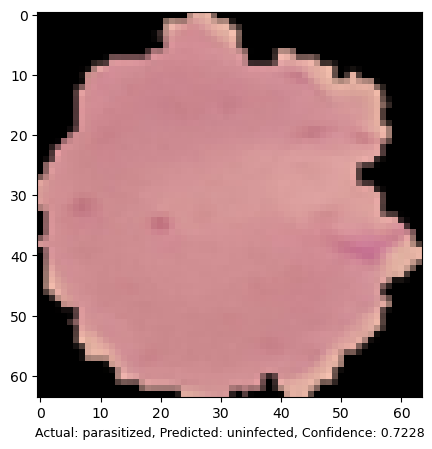

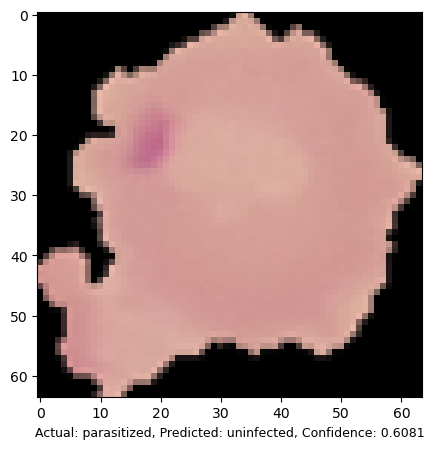

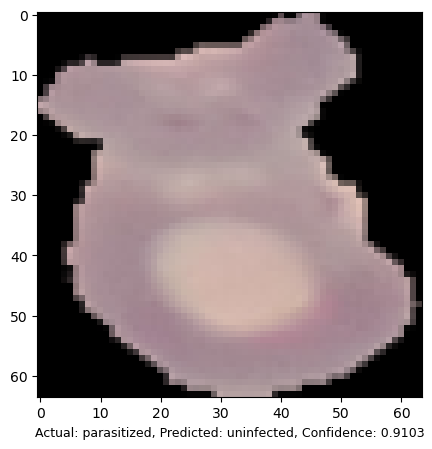

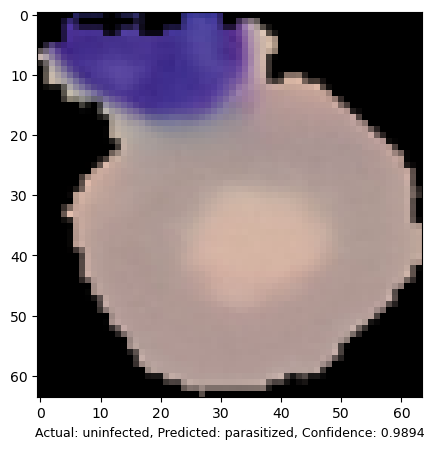

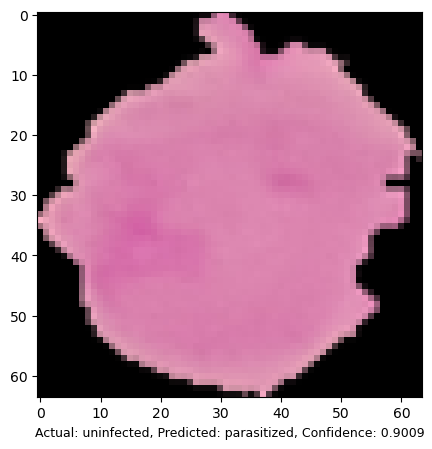

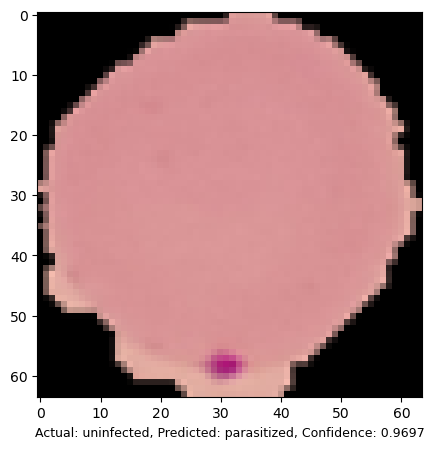

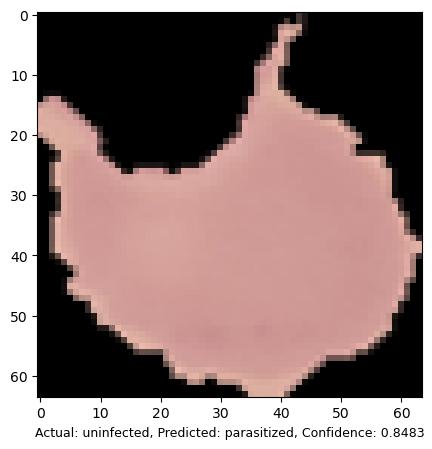

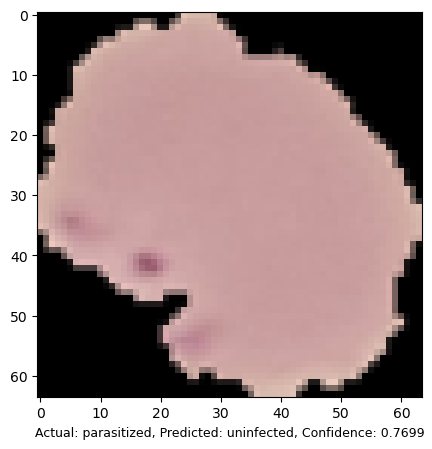

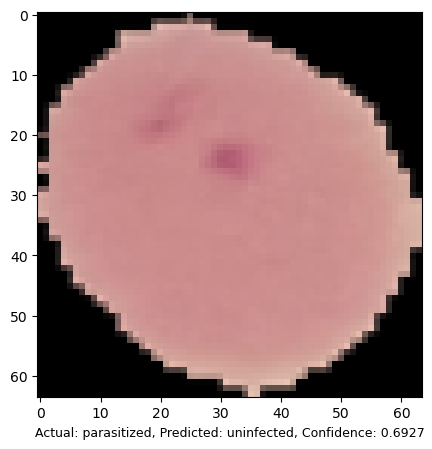

In [103]:
def plot_sample_wrong(X, y, index, pred):
    plt.figure(figsize = (30,5))
    plt.imshow(X[index])
    
    plt.xlabel(f"Actual: {classes[y[index]]}, Predicted: {classes[pred]}, Confidence: {f'{y_pred_percent[index]:.4f}'.rstrip('0').rstrip('.')}",fontsize=9)
misclassified_indices = np.where(y_test != y_pred)[0]
for i in misclassified_indices:
    plot_sample_wrong(X_test, y_test, i, y_pred[i])